In [ ]:
!pip install torch torchvision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 119.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 91.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 61.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 39.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 93.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjit

In [ ]:
import shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from google.colab import files
from sklearn.model_selection import train_test_split

In [ ]:
import kagglehub

trashData = kagglehub.dataset_download("amankamath/RealOcean-Garbage")

print("Path to dataset files:", trashData)


100%|██████████| 815M/815M [00:05<00:00, 146MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/amankamath/RealOcean-Garbage/versions/1


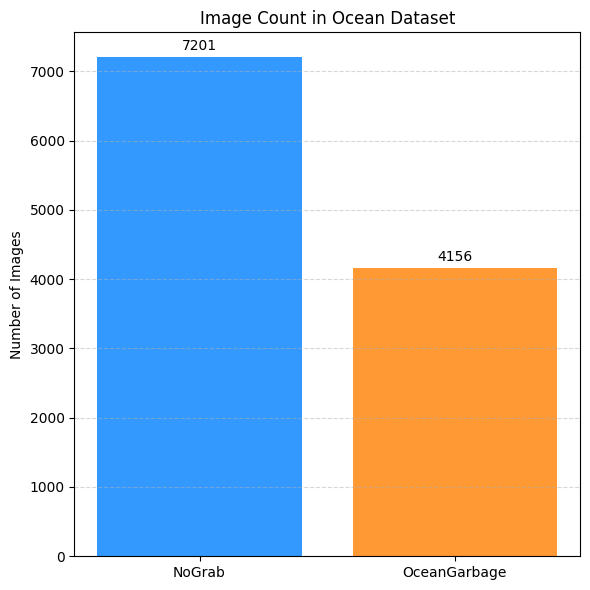

In [ ]:
import os
import matplotlib.pyplot as plt

# Folder paths
nograb_path = "/root/.cache/kagglehub/datasets/amankamath/RealOcean-Garbage/versions/1/FinalOcean/NoGrab"
garbage_path = "/root/.cache/kagglehub/datasets/amankamath/RealOcean-Garbage/versions/1/FinalOcean/OceanGarbage/Images"

# Count image files
nograb_count = len([f for f in os.listdir(nograb_path)])
garbage_count = len([f for f in os.listdir(garbage_path)])

# Plot
categories = ['NoGrab', 'OceanGarbage']
counts = [nograb_count, garbage_count]

plt.figure(figsize=(6, 6))
plt.bar(categories, counts, color=['#3399ff', '#ff9933'])
plt.title("Image Count in Ocean Dataset")
plt.ylabel("Number of Images")
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Annotate
for i, count in enumerate(counts):
    plt.text(i, count + 100, str(count), ha='center', fontsize=10)

plt.tight_layout()
plt.show()


In [ ]:
nograb_path = "/root/.cache/kagglehub/datasets/amankamath/RealOcean-Garbage/versions/1/FinalOcean/NoGrab"
garbage_path = "/root/.cache/kagglehub/datasets/amankamath/RealOcean-Garbage/versions/1/FinalOcean/OceanGarbage/Images"

# Count images
nograb_count = len([f for f in os.listdir(nograb_path)])
garbage_count = len([f for f in os.listdir(garbage_path)])

print(f"Non-Trash images: {nograb_count}")
print(f"OceanGarbage images: {garbage_count}")


Non-Trash images: 7201
OceanGarbage images: 4156


In [ ]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import numpy as np

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

dataset = datasets.ImageFolder(root="/root/.cache/kagglehub/datasets/amankamath/RealOcean-Garbage", transform=transform)
loader = DataLoader(dataset, batch_size=64, shuffle=False, num_workers=2)

mean = 0.
std = 0.
nb_samples = 0.

for data, _ in loader:
    batch_samples = data.size(0)
    data = data.view(batch_samples, data.size(1), -1)
    mean += data.mean(2).sum(0)
    std += data.std(2).sum(0)
    nb_samples += batch_samples

mean /= nb_samples
std /= nb_samples

print("Your dataset mean:", mean)
print("Your dataset std:", std)


Your dataset mean: tensor([0.2676, 0.4538, 0.4766])
Your dataset std: tensor([0.1816, 0.1811, 0.1767])


In [ ]:
import os
import cv2
import albumentations as A
from tqdm import tqdm

# === Dataset base paths ===
BASE_DIR = "/root/.cache/kagglehub/datasets/amankamath/RealOcean-Garbage/versions/1/FinalOcean"

# Garbage images and labels paths
garbage_img_dir = os.path.join(BASE_DIR, "OceanGarbage", "Images")
garbage_label_dir = os.path.join(BASE_DIR, "OceanGarbage", "Labels")

# NoGrab images path (no labels for these)
nograb_img_dir = os.path.join(BASE_DIR, "NoGrab")

# Output directories for augmented data
output_img_dir = "/kaggle/working/augmented_images"
output_label_dir = "/kaggle/working/augmented_labels"

os.makedirs(output_img_dir, exist_ok=True)
os.makedirs(output_label_dir, exist_ok=True)

# === Augmentations ===

# For garbage: with bounding box support (YOLO format)
transform_garbage = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.3),
    A.Rotate(limit=30, p=0.5),
    A.Resize(224, 224),
], bbox_params=A.BboxParams(format='yolo', label_fields=['class_labels']))

# For NoGrab: only image augmentations, no bounding boxes
transform_nograb = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.3),
    A.Rotate(limit=30, p=0.5),
    A.Resize(224, 224),
])

# === Augment Garbage images with bounding boxes ===
for img_file in tqdm(os.listdir(garbage_img_dir)):
    if not img_file.lower().endswith((".jpg", ".png", ".jpeg")):
        continue

    img_path = os.path.join(garbage_img_dir, img_file)
    label_path = os.path.join(garbage_label_dir, img_file.rsplit('.', 1)[0] + ".txt")

    image = cv2.imread(img_path)

    bboxes = []
    class_labels = []
    if os.path.exists(label_path):
        with open(label_path, "r") as f:
            for line in f:
                cls, x, y, w, h = map(float, line.strip().split())
                class_labels.append(int(cls))
                bboxes.append([x, y, w, h])

    augmented = transform_garbage(image=image, bboxes=bboxes, class_labels=class_labels)

    aug_img = augmented['image']
    aug_bboxes = augmented['bboxes']
    aug_labels = augmented['class_labels']

    # Save augmented image
    out_img_path = os.path.join(output_img_dir, img_file)
    cv2.imwrite(out_img_path, aug_img)

    # Save updated labels
    out_label_path = os.path.join(output_label_dir, img_file.rsplit('.', 1)[0] + ".txt")
    with open(out_label_path, "w") as f:
        for cls, box in zip(aug_labels, aug_bboxes):
            f.write(f"{cls} {' '.join(map(str, box))}\n")

# === Augment NoGrab images (no labels) ===
for img_file in tqdm(os.listdir(nograb_img_dir)):
    if not img_file.lower().endswith((".jpg", ".png", ".jpeg")):
        continue

    img_path = os.path.join(nograb_img_dir, img_file)
    image = cv2.imread(img_path)

    augmented = transform_nograb(image=image)
    aug_img = augmented['image']

    out_img_path = os.path.join(output_img_dir, img_file)
    cv2.imwrite(out_img_path, aug_img)


100%|██████████| 7201/7201 [00:19<00:00, 369.08it/s]


Total augmented images: 11357
Total augmented labels (should match garbage images count): 4156
Images missing labels (should be only NoGrab): ['gmn_6997up.jpg', 'gmn_6963up.jpg', 'gmn_6853up.jpg', 'gmn_8073up.jpg', 'nm_133up.jpg', 'test_9228up.jpg', 'nm_1148up.jpg', 'gmn_6942up.jpg', 'frame_11070_jpg.rf.9d0554f0a3034fecc49f3a3042ced577.jpg', 'nm_81up.jpg']
Count missing labels: 7201

Showing 10 random augmented garbage images with bounding boxes:


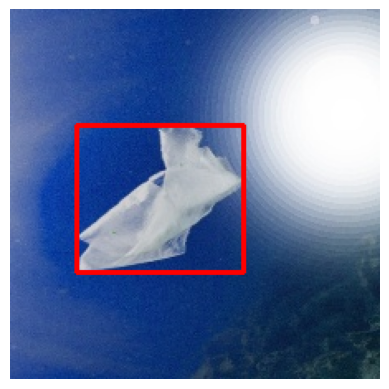

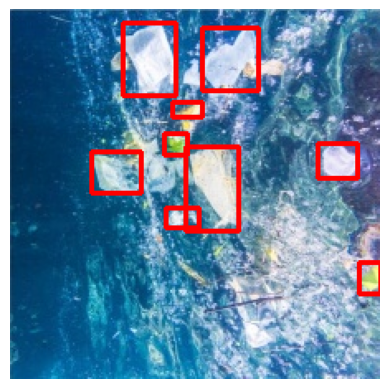

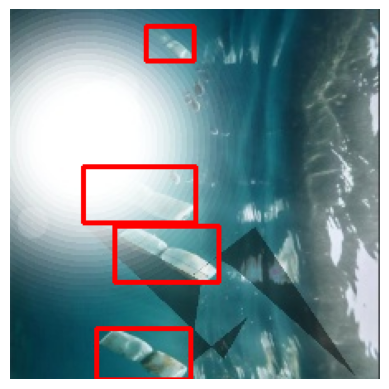

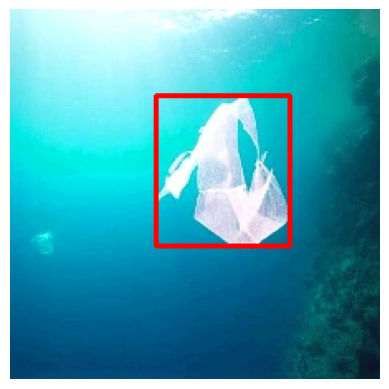

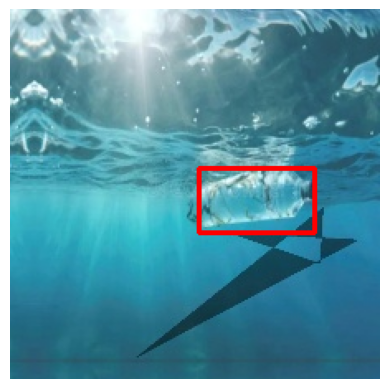

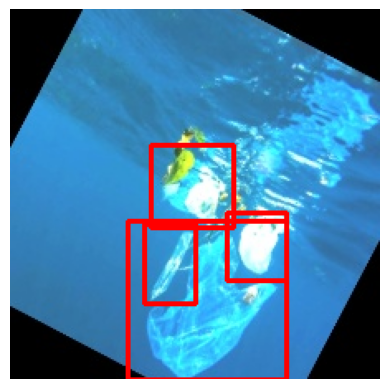

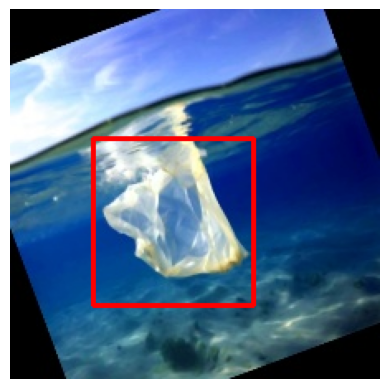

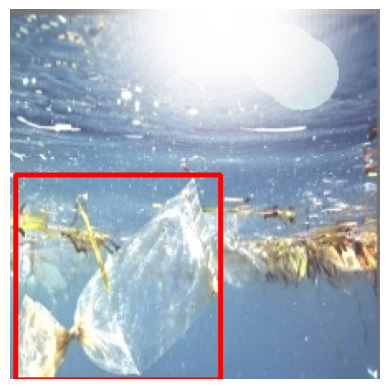

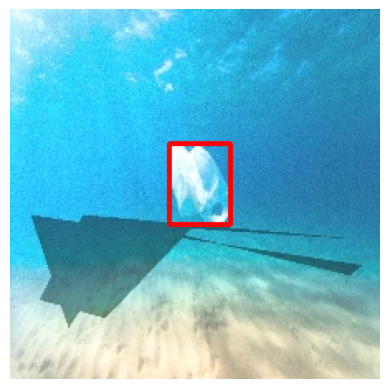

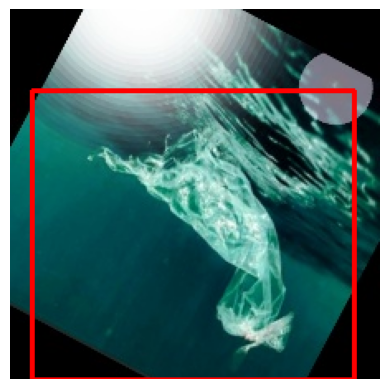


Original NoGrab images count: 7201
Augmented NoGrab images count: 7201
Sample NoGrab augmented images: ['gmn_6997up.jpg', 'gmn_6963up.jpg', 'gmn_6853up.jpg', 'gmn_8073up.jpg', 'nm_133up.jpg', 'test_9228up.jpg', 'nm_1148up.jpg', 'gmn_6942up.jpg', 'frame_11070_jpg.rf.9d0554f0a3034fecc49f3a3042ced577.jpg', 'nm_81up.jpg']


In [ ]:
import os
import cv2
from matplotlib import pyplot as plt
import random

# Paths to output augmented images and labels
output_img_dir = "/kaggle/working/augmented_images"
output_label_dir = "/kaggle/working/augmented_labels"

# Lists of augmented images and labels
aug_img_files = [f for f in os.listdir(output_img_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
aug_label_files = [f for f in os.listdir(output_label_dir) if f.lower().endswith('.txt')]

print(f"Total augmented images: {len(aug_img_files)}")
print(f"Total augmented labels (should match garbage images count): {len(aug_label_files)}")

# Check that all garbage images have labels
missing_labels = []
for img_file in aug_img_files:
    label_file = img_file.rsplit('.', 1)[0] + '.txt'
    if label_file not in aug_label_files:
        missing_labels.append(img_file)

print(f"Images missing labels (should be only NoGrab): {missing_labels[:10]}")
print(f"Count missing labels: {len(missing_labels)}")

# Visualize 5 random garbage images with bounding boxes
def show_image_with_bboxes(img_path, label_path):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    h, w, _ = img.shape

    with open(label_path, 'r') as f:
        lines = f.readlines()

    for line in lines:
        cls, x, y, bw, bh = line.strip().split()
        x, y, bw, bh = map(float, [x, y, bw, bh])

        # Convert YOLO bbox format to pixel coords
        x1 = int((x - bw / 2) * w)
        y1 = int((y - bh / 2) * h)
        x2 = int((x + bw / 2) * w)
        y2 = int((y + bh / 2) * h)

        cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)

    plt.imshow(img)
    plt.axis('off')
    plt.show()

print("\nShowing 10 random augmented garbage images with bounding boxes:")
garbage_imgs_with_labels = [f for f in aug_img_files if f.rsplit('.', 1)[0] + '.txt' in aug_label_files]
random_imgs = random.sample(garbage_imgs_with_labels, 10)
for img_file in random_imgs:
    show_image_with_bboxes(
        os.path.join(output_img_dir, img_file),
        os.path.join(output_label_dir, img_file.rsplit('.', 1)[0] + '.txt')
    )

# Check how many NoGrab images augmented (no labels expected)
original_nograb_count = len(os.listdir("/root/.cache/kagglehub/datasets/amankamath/RealOcean-Garbage/versions/1/FinalOcean/NoGrab"))
augmented_nograb_imgs = [f for f in aug_img_files if f not in garbage_imgs_with_labels]

print(f"\nOriginal NoGrab images count: {original_nograb_count}")
print(f"Augmented NoGrab images count: {len(augmented_nograb_imgs)}")
print(f"Sample NoGrab augmented images: {augmented_nograb_imgs[:10]}")


Total non-trash images: 7201


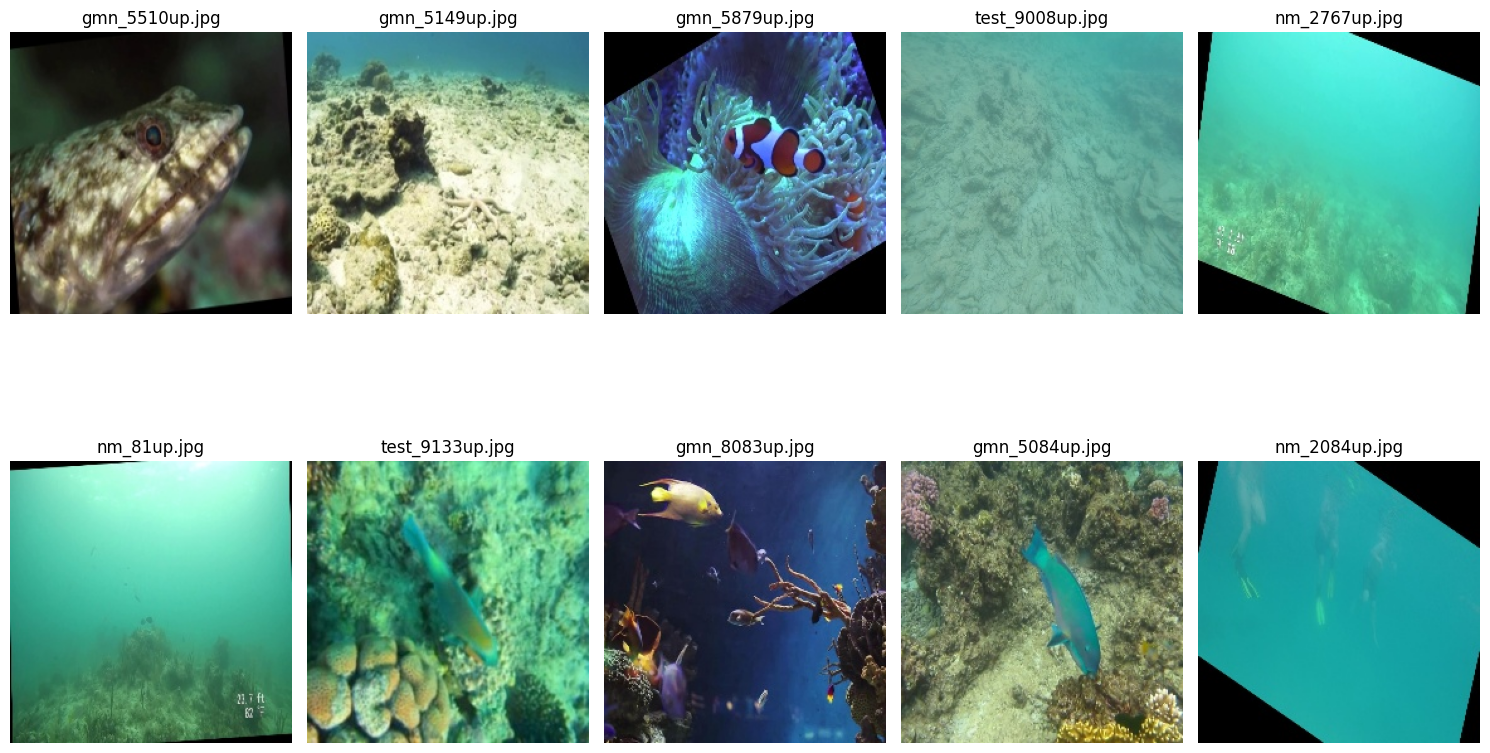

In [ ]:
import os
import random
import cv2
import matplotlib.pyplot as plt

# Path to your augmented images folder
augmented_img_dir = "/kaggle/working/augmented_images"

# Assuming non-trash images are those **without** corresponding label files
augmented_label_dir = "/kaggle/working/augmented_labels"
label_files = set([f.rsplit('.', 1)[0] for f in os.listdir(augmented_label_dir) if f.endswith('.txt')])

# Get all augmented images
all_images = [f for f in os.listdir(augmented_img_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

# Filter images with no label = NoGrab / non-trash
nontrash_images = [img for img in all_images if img.rsplit('.', 1)[0] not in label_files]

print(f"Total non-trash images: {len(nontrash_images)}")

# Pick 10 random non-trash images
sample_imgs = random.sample(nontrash_images, min(10, len(nontrash_images)))

# Plot them
plt.figure(figsize=(15, 10))
for i, img_name in enumerate(sample_imgs, 1):
    img_path = os.path.join(augmented_img_dir, img_name)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.subplot(2, 5, i)
    plt.imshow(img)
    plt.title(img_name)
    plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Base directories
base_dir = "/root/.cache/kagglehub/datasets/amankamath/RealOcean-Garbage/versions/1/FinalOcean"
split_base_dir = "/kaggle/working/split_data"

# Classes with relative paths
classes = {
    "OceanGarbage/Images": "Trash",
    "NoGrab": "NoGrab"
}

# Labels for Trash
labels_base_dir = os.path.join(base_dir, "OceanGarbage/Labels")

# Split ratios
train_ratio = 0.7
val_ratio = 0.15
test_ratio = 0.15

# Collect images + labels
all_data = []
for rel_path, label in classes.items():
    img_dir = os.path.join(base_dir, rel_path)
    images = os.listdir(img_dir)

    for img in images:
        img_path = os.path.join(img_dir, img)
        lbl_path = None

        if label == "Trash":
            lbl_filename = os.path.splitext(img)[0] + ".txt"
            lbl_path = os.path.join(labels_base_dir, lbl_filename)

        all_data.append(((img_path, label), lbl_path))

# Stratified split
train_data, temp_data = train_test_split(
    all_data,
    train_size=train_ratio,
    stratify=[c for (img, c), lbl in all_data],
    random_state=42
)
val_ratio_adj = val_ratio / (val_ratio + test_ratio)
val_data, test_data = train_test_split(
    temp_data,
    test_size=(1 - val_ratio_adj),
    stratify=[c for (img, c), lbl in temp_data],
    random_state=42
)

print(f"Train: {len(train_data)}, Val: {len(val_data)}, Test: {len(test_data)}")

# Helper to copy image and label
def copy_to_yolo_format(split_name, split_data):
    img_dir = os.path.join(split_base_dir, split_name, "images")
    lbl_dir = os.path.join(split_base_dir, split_name, "labels")
    os.makedirs(img_dir, exist_ok=True)
    os.makedirs(lbl_dir, exist_ok=True)

    for (img_path, cls), lbl_path in split_data:
        img_name = os.path.basename(img_path)
        lbl_name = os.path.splitext(img_name)[0] + ".txt"

        dst_img = os.path.join(img_dir, img_name)
        dst_lbl = os.path.join(lbl_dir, lbl_name)

        shutil.copy2(img_path, dst_img)

        if lbl_path is not None and os.path.exists(lbl_path):
            shutil.copy2(lbl_path, dst_lbl)
        else:
            # Create empty label file for NoGrab
            with open(dst_lbl, "w") as f:
                pass

# Process train and val
copy_to_yolo_format("train", train_data)
copy_to_yolo_format("val", val_data)

# Copy test images (no labels needed)
test_img_dir = os.path.join(split_base_dir, "test", "images")
os.makedirs(test_img_dir, exist_ok=True)

for (img_path, cls), lbl_path in test_data:
    dst_path = os.path.join(test_img_dir, os.path.basename(img_path))
    shutil.copy2(img_path, dst_path)

print("Dataset split.")



Train: 7949, Val: 1704, Test: 1704
Dataset split.


In [ ]:
import os

split_base_dir = "/kaggle/working/split_data"
splits = ["train", "val", "test"]

for split in splits:
    label_dir = os.path.join(split_base_dir, split, "labels")

    if not os.path.exists(label_dir):
        print(f"Skipping {split.upper()} SET — no labels folder found.\n")
        continue

    label_files = [f for f in os.listdir(label_dir) if f.endswith(".txt")]

    trash_images = 0
    background_images = 0

    for label_file in label_files:
        with open(os.path.join(label_dir, label_file), 'r') as f:
            lines = f.readlines()
            if len(lines) == 0:
                background_images += 1
            else:
                has_trash = any(int(line.strip().split()[0]) == 0 for line in lines)
                if has_trash:
                    trash_images += 1
                else:
                    background_images += 1

    print(f"=== {split.upper()} SET ===")
    print(f"Images with trash (class 0): {trash_images}")
    print(f"Images with only background or NoGrab: {background_images}\n")


=== TRAIN SET ===
Images with trash (class 0): 2909
Images with only background or NoGrab: 5040

=== VAL SET ===
Images with trash (class 0): 624
Images with only background or NoGrab: 1080

Skipping TEST SET — no labels folder found.



In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 18.5 MB/s eta 0:00:00


In [ ]:
import os
import csv
import yaml
import pandas as pd
from ultralytics import YOLO
from tqdm import tqdm

# ----------------------------------------------------
# 1. Write data.yaml
# ----------------------------------------------------
data_yaml = {
    'train': '/kaggle/working/split_data/train',
    'val': '/kaggle/working/split_data/val',
    'nc': 1,
    'names': ['Trash']
}
yaml_path = '/kaggle/working/data.yaml'
with open(yaml_path, 'w') as f:
    yaml.dump(data_yaml, f)

# ----------------------------------------------------
# 2. Train model
# ----------------------------------------------------
model = YOLO("yolov8n.pt")

results = model.train(
    data=yaml_path,
    epochs=130,
    imgsz=640,
    save=True,
    save_period=1,
    project="/kaggle/working/trash_yolo",
    name="yolov8_trash_model",
    exist_ok=True,
    verbose=False  # Turn off per-image predictions
)

# ----------------------------------------------------
# 3. Evaluate on validation set, build confusion CSV
# ----------------------------------------------------
predictions = []
actual_labels = []
image_paths = []

val_folder = '/kaggle/working/split_data/val/images'
label_folder = '/kaggle/working/split_data/val/labels'

for filename in tqdm(os.listdir(val_folder)):
    if not filename.endswith(('.jpg', '.jpeg', '.png')): continue

    image_path = os.path.join(val_folder, filename)
    label_path = os.path.join(label_folder, os.path.splitext(filename)[0] + ".txt")

    result = model(image_path, verbose=False)[0]

    pred_labels = [result.names[int(b.cls)] for b in result.boxes] if result.boxes else []

    # Get actual label
    if os.path.exists(label_path):
        with open(label_path, 'r') as f:
            actual = ['Trash' for _ in f.readlines() if f]
    else:
        actual = []

    # Append to confusion lists
    actual_labels.append('Trash' if actual else 'NoGrab')
    predictions.append('Trash' if pred_labels else 'NoGrab')
    image_paths.append(filename)

# Save confusion matrix CSV
df = pd.DataFrame({
    "image": image_paths,
    "actual": actual_labels,
    "predicted": predictions
})
df.to_csv("/kaggle/working/confusion_matrix.csv", index=False)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 71.7MB/s]


Ultralytics 8.3.170 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=130, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8_trash_model, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True

100%|██████████| 755k/755k [00:00<00:00, 15.5MB/s]

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

Model summary: 129 layers, 3,011,043 parameters, 3,011,027 gradients, 8.2 GFLOPs

Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 61.7MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1192.1±526.1 MB/s, size: 31.9 KB)


train: Scanning /kaggle/working/split_data/train/labels... 7949 images, 5040 backgrounds, 0 corrupt: 100%|██████████| 7949/7949 [00:04<00:00, 1951.14it/s]


train: New cache created: /kaggle/working/split_data/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1469.6±722.0 MB/s, size: 94.6 KB)


val: Scanning /kaggle/working/split_data/val/labels... 1704 images, 1080 backgrounds, 0 corrupt: 100%|██████████| 1704/1704 [00:01<00:00, 1541.38it/s]

val: New cache created: /kaggle/working/split_data/val/labels.cache


Plotting labels to /kaggle/working/trash_yolo/yolov8_trash_model/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to /kaggle/working/trash_yolo/yolov8_trash_model
Starting training for 130 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/130      2.13G      1.162      2.889      1.355         15        640: 100%|██████████| 497/497 [00:46<00:00, 10.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:07<00:00,  7.68it/s]


                   all       1704       1287      0.693       0.47      0.545      0.372

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/130      2.64G      1.272      2.044      1.416         11        640: 100%|██████████| 497/497 [00:43<00:00, 11.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:04<00:00, 12.16it/s]


                   all       1704       1287      0.518      0.354      0.345      0.233

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/130      2.65G      1.469      2.009      1.545         25        640: 100%|██████████| 497/497 [00:42<00:00, 11.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:04<00:00, 11.88it/s]


                   all       1704       1287       0.46      0.294      0.293      0.168

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/130      2.67G      1.568      2.027      1.629         26        640: 100%|██████████| 497/497 [00:41<00:00, 11.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:04<00:00, 12.37it/s]


                   all       1704       1287      0.516      0.439      0.437      0.271

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/130      2.68G      1.506      1.847      1.598         46        640: 100%|██████████| 497/497 [00:42<00:00, 11.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:04<00:00, 12.69it/s]


                   all       1704       1287      0.671      0.451      0.524      0.339

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/130      2.69G      1.434      1.742      1.546         33        640: 100%|██████████| 497/497 [00:42<00:00, 11.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:04<00:00, 13.50it/s]

                   all       1704       1287      0.669      0.454      0.534      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/130       2.7G      1.388      1.668      1.514         30        640: 100%|██████████| 497/497 [00:42<00:00, 11.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:04<00:00, 12.78it/s]


                   all       1704       1287      0.714      0.519      0.611      0.414

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/130      2.71G      1.357      1.595      1.503         17        640: 100%|██████████| 497/497 [00:42<00:00, 11.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:04<00:00, 11.77it/s]


                   all       1704       1287       0.67       0.51      0.573      0.383

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/130      2.72G      1.317      1.512      1.456         29        640: 100%|██████████| 497/497 [00:42<00:00, 11.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:04<00:00, 12.43it/s]

                   all       1704       1287      0.765      0.508      0.635      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/130      2.73G       1.28      1.478      1.428         18        640: 100%|██████████| 497/497 [00:41<00:00, 11.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:04<00:00, 12.09it/s]


                   all       1704       1287      0.662      0.549       0.61      0.413

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/130      2.75G      1.273      1.435      1.425         17        640: 100%|██████████| 497/497 [00:42<00:00, 11.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:04<00:00, 12.38it/s]


                   all       1704       1287      0.755      0.564      0.655      0.456

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/130      2.76G       1.26      1.407      1.413         18        640: 100%|██████████| 497/497 [00:42<00:00, 11.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:04<00:00, 12.46it/s]


                   all       1704       1287      0.766      0.589      0.686       0.48

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/130      2.77G       1.23       1.34      1.393         29        640: 100%|██████████| 497/497 [00:41<00:00, 11.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:04<00:00, 13.27it/s]

                   all       1704       1287      0.797      0.578      0.683      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/130      2.78G      1.205      1.318       1.38         14        640: 100%|██████████| 497/497 [00:42<00:00, 11.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:04<00:00, 12.90it/s]


                   all       1704       1287      0.808      0.591      0.706      0.511

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/130      2.79G      1.197      1.317      1.378          9        640: 100%|██████████| 497/497 [00:42<00:00, 11.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:04<00:00, 12.50it/s]

                   all       1704       1287      0.795      0.577      0.687      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/130       2.8G      1.174      1.259      1.357          9        640: 100%|██████████| 497/497 [00:42<00:00, 11.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:04<00:00, 13.11it/s]

                   all       1704       1287      0.769      0.611      0.703      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/130      2.81G      1.165      1.231      1.347         16        640: 100%|██████████| 497/497 [00:42<00:00, 11.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:04<00:00, 13.43it/s]

                   all       1704       1287      0.772      0.635      0.727      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/130      2.83G      1.147      1.212      1.332         21        640: 100%|██████████| 497/497 [00:42<00:00, 11.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:04<00:00, 12.77it/s]

                   all       1704       1287       0.78      0.654      0.747      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/130      2.84G      1.139      1.185      1.336          9        640: 100%|██████████| 497/497 [00:42<00:00, 11.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:04<00:00, 12.64it/s]


                   all       1704       1287      0.804       0.66      0.764      0.559

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/130      2.85G      1.104       1.13       1.31         10        640: 100%|██████████| 497/497 [00:42<00:00, 11.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:04<00:00, 13.40it/s]

                   all       1704       1287      0.839      0.629      0.752      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/130      2.86G      1.108      1.139      1.321         14        640: 100%|██████████| 497/497 [00:42<00:00, 11.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:04<00:00, 13.00it/s]

                   all       1704       1287       0.82      0.655      0.771      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/130      2.87G      1.111      1.132      1.313          9        640: 100%|██████████| 497/497 [00:42<00:00, 11.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:03<00:00, 13.78it/s]

                   all       1704       1287       0.83      0.685      0.798      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/130      2.88G      1.085      1.103      1.299         29        640: 100%|██████████| 497/497 [00:43<00:00, 11.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:03<00:00, 14.20it/s]

                   all       1704       1287      0.819      0.688      0.789      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/130      2.89G      1.083      1.087       1.29         12        640: 100%|██████████| 497/497 [00:43<00:00, 11.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:04<00:00, 13.05it/s]

                   all       1704       1287      0.816      0.715      0.811       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/130      2.91G      1.057      1.053      1.277         11        640: 100%|██████████| 497/497 [00:42<00:00, 11.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:04<00:00, 13.37it/s]

                   all       1704       1287      0.843      0.675      0.796      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/130      2.92G      1.038      1.034      1.266         12        640: 100%|██████████| 497/497 [00:42<00:00, 11.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:03<00:00, 14.43it/s]

                   all       1704       1287       0.85      0.689      0.798      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/130      2.93G      1.052      1.047      1.279         19        640: 100%|██████████| 497/497 [00:42<00:00, 11.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:04<00:00, 13.23it/s]

                   all       1704       1287      0.805      0.713      0.805      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/130      2.94G      1.051      1.017      1.264         20        640: 100%|██████████| 497/497 [00:43<00:00, 11.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:04<00:00, 13.16it/s]

                   all       1704       1287       0.84      0.696      0.813      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/130      2.95G      1.034     0.9949      1.252         11        640: 100%|██████████| 497/497 [00:43<00:00, 11.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:03<00:00, 14.03it/s]

                   all       1704       1287      0.873      0.718      0.836      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/130      2.96G      1.051      1.015      1.259         22        640: 100%|██████████| 497/497 [00:43<00:00, 11.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:04<00:00, 12.58it/s]

                   all       1704       1287      0.844      0.749      0.841      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/130      2.97G       1.02     0.9708      1.248         29        640: 100%|██████████| 497/497 [00:43<00:00, 11.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:03<00:00, 13.58it/s]

                   all       1704       1287      0.878      0.729      0.847       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/130      2.98G      1.035     0.9978      1.255         15        640: 100%|██████████| 497/497 [00:42<00:00, 11.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:04<00:00, 13.45it/s]

                   all       1704       1287      0.879      0.736      0.843      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/130         3G      1.024     0.9904      1.257         17        640: 100%|██████████| 497/497 [00:43<00:00, 11.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:04<00:00, 13.19it/s]

                   all       1704       1287       0.84      0.736      0.835      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/130      3.01G      1.004     0.9698      1.229          7        640: 100%|██████████| 497/497 [00:43<00:00, 11.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:03<00:00, 13.62it/s]

                   all       1704       1287      0.817      0.781      0.851      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/130      3.02G       1.01     0.9464      1.243         19        640: 100%|██████████| 497/497 [00:43<00:00, 11.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:04<00:00, 13.33it/s]

                   all       1704       1287      0.866      0.787      0.864      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/130      3.03G     0.9951     0.9131      1.225         12        640: 100%|██████████| 497/497 [00:43<00:00, 11.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:04<00:00, 13.46it/s]

                   all       1704       1287      0.867      0.785      0.863      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/130      3.04G     0.9925     0.9126      1.221         19        640: 100%|██████████| 497/497 [00:43<00:00, 11.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:03<00:00, 13.89it/s]

                   all       1704       1287      0.903      0.786      0.876      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/130      3.05G     0.9844      0.903      1.218         24        640: 100%|██████████| 497/497 [00:42<00:00, 11.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:03<00:00, 14.14it/s]

                   all       1704       1287      0.911      0.776      0.877      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/130      3.06G     0.9768     0.8859      1.223         22        640: 100%|██████████| 497/497 [00:43<00:00, 11.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:03<00:00, 14.23it/s]

                   all       1704       1287      0.892      0.795      0.875      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/130      3.08G     0.9552     0.8688      1.206         27        640: 100%|██████████| 497/497 [00:43<00:00, 11.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:03<00:00, 13.67it/s]

                   all       1704       1287      0.879      0.782      0.876      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/130      3.09G     0.9823     0.8884      1.216         19        640: 100%|██████████| 497/497 [00:43<00:00, 11.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:03<00:00, 14.20it/s]

                   all       1704       1287       0.91      0.783      0.881      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/130       3.1G     0.9628     0.8807      1.209         19        640: 100%|██████████| 497/497 [00:43<00:00, 11.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:03<00:00, 14.02it/s]

                   all       1704       1287      0.904      0.772      0.877       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/130      3.11G       0.96     0.8563      1.202         20        640: 100%|██████████| 497/497 [00:43<00:00, 11.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:03<00:00, 13.83it/s]

                   all       1704       1287      0.877      0.776      0.877      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/130      3.12G     0.9529     0.8683      1.196         30        640: 100%|██████████| 497/497 [00:43<00:00, 11.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:03<00:00, 14.08it/s]

                   all       1704       1287      0.879      0.811       0.89      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/130      3.14G     0.9462     0.8428      1.193          8        640: 100%|██████████| 497/497 [00:42<00:00, 11.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:03<00:00, 14.07it/s]

                   all       1704       1287      0.896      0.798      0.888      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/130      3.15G     0.9455     0.8496       1.19          9        640: 100%|██████████| 497/497 [00:43<00:00, 11.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:03<00:00, 14.19it/s]

                   all       1704       1287      0.877      0.829      0.896      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/130      3.16G     0.9473     0.8278      1.192         12        640: 100%|██████████| 497/497 [00:42<00:00, 11.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:03<00:00, 14.21it/s]

                   all       1704       1287      0.911      0.811      0.891      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/130      3.17G     0.9145     0.8072      1.178          7        640: 100%|██████████| 497/497 [00:43<00:00, 11.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:03<00:00, 14.10it/s]

                   all       1704       1287      0.923      0.811      0.901      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/130      3.18G     0.9323     0.8337      1.191         14        640: 100%|██████████| 497/497 [00:43<00:00, 11.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:03<00:00, 13.77it/s]

                   all       1704       1287      0.907      0.819      0.903      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/130      3.19G     0.9102     0.7956      1.177          7        640: 100%|██████████| 497/497 [00:42<00:00, 11.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:03<00:00, 13.94it/s]

                   all       1704       1287      0.898       0.84      0.911      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/130       3.2G     0.9365     0.8031      1.185         17        640: 100%|██████████| 497/497 [00:42<00:00, 11.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:03<00:00, 13.52it/s]

                   all       1704       1287      0.917       0.82      0.906      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/130      3.21G     0.9129     0.8071      1.176         24        640: 100%|██████████| 497/497 [00:42<00:00, 11.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:03<00:00, 13.78it/s]

                   all       1704       1287      0.924      0.823      0.909      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/130      3.22G     0.9144     0.8022      1.175         17        640: 100%|██████████| 497/497 [00:42<00:00, 11.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:03<00:00, 13.91it/s]

                   all       1704       1287      0.894      0.847      0.909      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/130      3.24G     0.9133     0.7845      1.171         12        640: 100%|██████████| 497/497 [00:42<00:00, 11.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:03<00:00, 14.07it/s]

                   all       1704       1287      0.914       0.84      0.911       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/130      3.25G     0.8951     0.7722      1.161          9        640: 100%|██████████| 497/497 [00:43<00:00, 11.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:03<00:00, 14.04it/s]

                   all       1704       1287      0.929      0.825       0.91      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/130      3.26G     0.8939     0.7815       1.16          9        640: 100%|██████████| 497/497 [00:42<00:00, 11.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:03<00:00, 14.29it/s]

                   all       1704       1287      0.915      0.857       0.92      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/130      3.27G     0.9004     0.7669      1.164         17        640: 100%|██████████| 497/497 [00:42<00:00, 11.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:03<00:00, 13.88it/s]

                   all       1704       1287      0.914      0.849      0.918      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/130      3.29G     0.8911     0.7598      1.152         11        640: 100%|██████████| 497/497 [00:43<00:00, 11.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:03<00:00, 14.20it/s]

                   all       1704       1287       0.91      0.863      0.923      0.753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/130      3.29G     0.8902     0.7573      1.154         25        640: 100%|██████████| 497/497 [00:43<00:00, 11.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:03<00:00, 14.16it/s]

                   all       1704       1287      0.918      0.865      0.928      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/130       3.3G     0.8548     0.7368      1.135         31        640: 100%|██████████| 497/497 [00:42<00:00, 11.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:03<00:00, 14.48it/s]

                   all       1704       1287      0.933      0.852      0.927       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/130      3.32G     0.8646     0.7359      1.146          8        640: 100%|██████████| 497/497 [00:43<00:00, 11.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:03<00:00, 14.23it/s]

                   all       1704       1287      0.909      0.865      0.924      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/130      3.33G     0.8792     0.7485      1.148         14        640: 100%|██████████| 497/497 [00:43<00:00, 11.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:03<00:00, 14.39it/s]

                   all       1704       1287      0.908      0.872      0.924       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/130      3.34G      0.863     0.7236      1.143         19        640: 100%|██████████| 497/497 [00:42<00:00, 11.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:03<00:00, 14.38it/s]

                   all       1704       1287      0.907      0.859      0.921       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/130      3.35G     0.8629     0.7174      1.132         13        640: 100%|██████████| 497/497 [00:42<00:00, 11.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:03<00:00, 14.50it/s]

                   all       1704       1287      0.931      0.854      0.924      0.766



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/130      3.36G     0.8643     0.7077      1.135         14        640: 100%|██████████| 497/497 [00:43<00:00, 11.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:03<00:00, 14.25it/s]

                   all       1704       1287      0.923      0.861      0.927      0.767



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/130      3.37G     0.8592     0.7179      1.139         22        640: 100%|██████████| 497/497 [00:43<00:00, 11.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:03<00:00, 14.19it/s]

                   all       1704       1287      0.929      0.865      0.932      0.772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/130      3.38G     0.8609      0.708       1.14          9        640: 100%|██████████| 497/497 [00:42<00:00, 11.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:03<00:00, 14.23it/s]

                   all       1704       1287      0.923      0.873      0.933      0.777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/130       3.4G     0.8455     0.7096      1.132         19        640: 100%|██████████| 497/497 [00:42<00:00, 11.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:03<00:00, 14.63it/s]

                   all       1704       1287      0.921      0.872      0.932      0.774



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/130      3.41G      0.862     0.7133      1.144         14        640: 100%|██████████| 497/497 [00:43<00:00, 11.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:03<00:00, 14.25it/s]

                   all       1704       1287      0.945       0.86      0.934      0.775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/130      3.42G     0.8541     0.7048      1.136          7        640: 100%|██████████| 497/497 [00:43<00:00, 11.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:03<00:00, 14.79it/s]

                   all       1704       1287      0.929      0.871      0.934      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/130      3.43G     0.8429     0.6844       1.12         12        640: 100%|██████████| 497/497 [00:43<00:00, 11.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:03<00:00, 14.81it/s]

                   all       1704       1287       0.93       0.88      0.936      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/130      3.44G     0.8404     0.6982      1.128         12        640: 100%|██████████| 497/497 [00:43<00:00, 11.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:03<00:00, 14.28it/s]

                   all       1704       1287       0.94      0.881      0.938      0.788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/130      3.46G     0.8284     0.6764      1.121         12        640: 100%|██████████| 497/497 [00:43<00:00, 11.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:03<00:00, 14.54it/s]

                   all       1704       1287      0.933      0.881      0.938      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/130      3.46G     0.8196      0.669       1.11         10        640: 100%|██████████| 497/497 [00:43<00:00, 11.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:03<00:00, 14.46it/s]

                   all       1704       1287      0.934      0.884       0.94      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/130      3.48G     0.8355      0.673       1.12         18        640: 100%|██████████| 497/497 [00:43<00:00, 11.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:03<00:00, 14.48it/s]

                   all       1704       1287      0.938       0.89       0.94      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/130      3.49G     0.8134     0.6535      1.111         17        640: 100%|██████████| 497/497 [00:43<00:00, 11.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:03<00:00, 14.59it/s]

                   all       1704       1287      0.937      0.884      0.939      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/130       3.5G     0.8162     0.6604       1.11         16        640: 100%|██████████| 497/497 [00:43<00:00, 11.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:03<00:00, 14.63it/s]

                   all       1704       1287      0.939      0.881      0.939      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/130      3.51G     0.8207     0.6595      1.106          7        640: 100%|██████████| 497/497 [00:43<00:00, 11.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:03<00:00, 14.65it/s]

                   all       1704       1287      0.939      0.886       0.94      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/130      3.52G     0.8323     0.6673       1.12         21        640: 100%|██████████| 497/497 [00:43<00:00, 11.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:03<00:00, 14.39it/s]

                   all       1704       1287      0.938      0.886      0.941      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/130      3.53G     0.8156     0.6553      1.105         14        640: 100%|██████████| 497/497 [00:43<00:00, 11.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:03<00:00, 14.72it/s]

                   all       1704       1287      0.949       0.87       0.94      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/130      3.54G     0.7913     0.6395      1.096         29        640: 100%|██████████| 497/497 [00:43<00:00, 11.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:03<00:00, 14.96it/s]

                   all       1704       1287      0.943      0.883      0.942      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/130      3.56G     0.8031     0.6407      1.107         17        640: 100%|██████████| 497/497 [00:43<00:00, 11.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:03<00:00, 14.71it/s]

                   all       1704       1287      0.946      0.886      0.944      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/130      3.57G     0.7952     0.6407      1.101         39        640: 100%|██████████| 497/497 [00:43<00:00, 11.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:03<00:00, 14.45it/s]

                   all       1704       1287      0.941      0.888      0.944      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/130      3.58G     0.7941     0.6334      1.096         11        640: 100%|██████████| 497/497 [00:43<00:00, 11.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:03<00:00, 14.49it/s]

                   all       1704       1287      0.932      0.899      0.946      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/130      3.59G     0.7979     0.6413      1.099         12        640: 100%|██████████| 497/497 [00:43<00:00, 11.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:03<00:00, 14.40it/s]

                   all       1704       1287      0.942      0.887      0.946      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/130       3.6G     0.7759     0.6169      1.086         26        640: 100%|██████████| 497/497 [00:43<00:00, 11.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:03<00:00, 14.69it/s]

                   all       1704       1287      0.939       0.89      0.947      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/130      3.61G     0.7759     0.6133      1.093         21        640: 100%|██████████| 497/497 [00:43<00:00, 11.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:03<00:00, 14.56it/s]

                   all       1704       1287      0.951      0.887      0.948      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/130      3.62G     0.7873     0.6143      1.088          5        640: 100%|██████████| 497/497 [00:43<00:00, 11.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:03<00:00, 14.55it/s]

                   all       1704       1287      0.946       0.89      0.948       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/130      3.64G     0.7855     0.6156      1.092         20        640: 100%|██████████| 497/497 [00:43<00:00, 11.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:03<00:00, 14.90it/s]

                   all       1704       1287      0.951      0.889      0.947       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/130      3.65G     0.7721     0.6047      1.086         12        640: 100%|██████████| 497/497 [00:43<00:00, 11.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:03<00:00, 14.65it/s]

                   all       1704       1287      0.954      0.882      0.947       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/130      3.66G     0.7855     0.6168      1.094         31        640: 100%|██████████| 497/497 [00:43<00:00, 11.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:03<00:00, 14.80it/s]

                   all       1704       1287       0.94      0.898      0.947      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/130      3.67G     0.7718     0.6141      1.083         20        640: 100%|██████████| 497/497 [00:43<00:00, 11.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:03<00:00, 14.89it/s]

                   all       1704       1287      0.942      0.897      0.948      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/130      3.69G     0.7597     0.5909      1.077          8        640: 100%|██████████| 497/497 [00:43<00:00, 11.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:03<00:00, 13.99it/s]

                   all       1704       1287      0.953      0.892      0.948      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/130       3.7G     0.7519     0.5901      1.075         10        640: 100%|██████████| 497/497 [00:43<00:00, 11.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:03<00:00, 14.04it/s]

                   all       1704       1287      0.961      0.889      0.949      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/130      3.71G     0.7593     0.5951      1.076         10        640: 100%|██████████| 497/497 [00:43<00:00, 11.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:03<00:00, 14.04it/s]

                   all       1704       1287      0.953      0.901      0.951      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/130      3.72G     0.7434     0.5679      1.069          9        640: 100%|██████████| 497/497 [00:43<00:00, 11.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:03<00:00, 14.10it/s]

                   all       1704       1287      0.952      0.906      0.951      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/130      3.73G      0.751     0.5709      1.068         20        640: 100%|██████████| 497/497 [00:43<00:00, 11.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:03<00:00, 14.34it/s]

                   all       1704       1287      0.955      0.904      0.952       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/130      3.74G     0.7555     0.5766      1.069         12        640: 100%|██████████| 497/497 [00:43<00:00, 11.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:03<00:00, 14.51it/s]

                   all       1704       1287      0.956      0.905      0.953      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/130      3.75G     0.7434     0.5809      1.068          5        640: 100%|██████████| 497/497 [00:43<00:00, 11.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:03<00:00, 14.46it/s]

                   all       1704       1287      0.954      0.904      0.953      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/130      3.76G     0.7403     0.5776      1.071         44        640: 100%|██████████| 497/497 [00:43<00:00, 11.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:03<00:00, 14.54it/s]

                   all       1704       1287      0.956      0.904      0.954      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/130      3.77G     0.7466     0.5781       1.07         21        640: 100%|██████████| 497/497 [00:43<00:00, 11.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:03<00:00, 14.51it/s]

                   all       1704       1287      0.953      0.901      0.954      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/130      3.79G     0.7244     0.5541       1.06         38        640: 100%|██████████| 497/497 [00:43<00:00, 11.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:03<00:00, 14.52it/s]

                   all       1704       1287      0.946      0.905      0.955      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/130       3.8G     0.7197     0.5533      1.053         37        640: 100%|██████████| 497/497 [00:43<00:00, 11.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:03<00:00, 14.49it/s]

                   all       1704       1287      0.957      0.904      0.956      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/130      3.81G     0.7124     0.5501       1.05         37        640: 100%|██████████| 497/497 [00:43<00:00, 11.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:03<00:00, 15.00it/s]

                   all       1704       1287      0.957      0.909      0.956      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/130      3.82G     0.7232     0.5509      1.062         12        640: 100%|██████████| 497/497 [00:43<00:00, 11.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:03<00:00, 14.54it/s]

                   all       1704       1287       0.96      0.909      0.957      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/130      3.83G     0.7258     0.5546       1.06         37        640: 100%|██████████| 497/497 [00:43<00:00, 11.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:03<00:00, 14.36it/s]

                   all       1704       1287      0.959      0.908      0.957      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/130      3.85G     0.7076     0.5393      1.043          7        640: 100%|██████████| 497/497 [00:43<00:00, 11.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:03<00:00, 14.86it/s]

                   all       1704       1287       0.96      0.907      0.957      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/130      3.85G     0.7063     0.5451       1.05         28        640: 100%|██████████| 497/497 [00:43<00:00, 11.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:03<00:00, 14.48it/s]

                   all       1704       1287       0.96      0.909      0.957      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/130      3.87G     0.7079     0.5351      1.052         17        640: 100%|██████████| 497/497 [00:43<00:00, 11.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:03<00:00, 14.27it/s]

                   all       1704       1287      0.959       0.91      0.957      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/130      3.88G     0.7007     0.5313      1.048         21        640: 100%|██████████| 497/497 [00:43<00:00, 11.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:03<00:00, 14.33it/s]

                   all       1704       1287      0.957      0.911      0.957      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/130      3.89G     0.6966     0.5324      1.048         18        640: 100%|██████████| 497/497 [00:43<00:00, 11.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:03<00:00, 14.97it/s]

                   all       1704       1287      0.961      0.911      0.958      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/130       3.9G     0.6957     0.5256      1.044          4        640: 100%|██████████| 497/497 [00:43<00:00, 11.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:03<00:00, 14.68it/s]

                   all       1704       1287      0.958      0.911      0.957      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/130      3.91G     0.6963     0.5303      1.043         33        640: 100%|██████████| 497/497 [00:43<00:00, 11.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:03<00:00, 14.92it/s]

                   all       1704       1287      0.957      0.911      0.958      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/130      3.93G     0.6871     0.5211      1.048          8        640: 100%|██████████| 497/497 [00:43<00:00, 11.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:03<00:00, 14.65it/s]

                   all       1704       1287       0.96      0.908      0.958       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/130      3.93G     0.6949     0.5309      1.048         18        640: 100%|██████████| 497/497 [00:43<00:00, 11.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:03<00:00, 14.89it/s]

                   all       1704       1287      0.962      0.908      0.957      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/130      3.95G     0.6789     0.5119      1.035          9        640: 100%|██████████| 497/497 [00:43<00:00, 11.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:03<00:00, 15.05it/s]

                   all       1704       1287      0.964       0.91      0.958       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/130      3.96G     0.6849     0.5117      1.037         23        640: 100%|██████████| 497/497 [00:43<00:00, 11.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:03<00:00, 14.72it/s]

                   all       1704       1287      0.962      0.913      0.958       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/130      3.97G     0.6693     0.5115      1.035         18        640: 100%|██████████| 497/497 [00:43<00:00, 11.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:03<00:00, 14.99it/s]

                   all       1704       1287      0.963      0.912      0.958      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/130      3.98G      0.682     0.5186      1.038          3        640: 100%|██████████| 497/497 [00:43<00:00, 11.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:03<00:00, 14.80it/s]

                   all       1704       1287      0.963      0.912      0.959      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/130      3.99G     0.6694     0.5043      1.034         14        640: 100%|██████████| 497/497 [00:43<00:00, 11.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:03<00:00, 15.18it/s]

                   all       1704       1287       0.96      0.913      0.959      0.832


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/130         4G     0.5303      0.375     0.9318          3        640: 100%|██████████| 497/497 [00:44<00:00, 11.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:03<00:00, 14.64it/s]

                   all       1704       1287       0.96      0.912      0.959      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/130      4.01G     0.5078     0.3464     0.9202         12        640: 100%|██████████| 497/497 [00:43<00:00, 11.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:03<00:00, 14.46it/s]

                   all       1704       1287      0.963      0.913       0.96      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/130      4.03G     0.4971     0.3402     0.9171          8        640: 100%|██████████| 497/497 [00:42<00:00, 11.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:03<00:00, 14.85it/s]

                   all       1704       1287      0.962      0.914       0.96      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/130      4.04G     0.4986     0.3377     0.9224          1        640: 100%|██████████| 497/497 [00:43<00:00, 11.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:03<00:00, 14.81it/s]

                   all       1704       1287      0.962      0.916       0.96      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/130      4.05G     0.4919     0.3252     0.9105         10        640: 100%|██████████| 497/497 [00:42<00:00, 11.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:03<00:00, 14.90it/s]

                   all       1704       1287      0.962      0.918       0.96      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/130      4.06G       0.49     0.3248     0.9107         18        640: 100%|██████████| 497/497 [00:43<00:00, 11.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:03<00:00, 14.16it/s]

                   all       1704       1287      0.961      0.918       0.96      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/130      4.07G     0.4846     0.3211     0.9057         29        640: 100%|██████████| 497/497 [00:43<00:00, 11.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:03<00:00, 14.30it/s]

                   all       1704       1287       0.96      0.918      0.961      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/130      4.08G     0.4786     0.3221     0.9131          1        640: 100%|██████████| 497/497 [00:43<00:00, 11.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:03<00:00, 14.65it/s]

                   all       1704       1287      0.959      0.917      0.961      0.839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/130      4.09G     0.4798     0.3225     0.9154         30        640: 100%|██████████| 497/497 [00:43<00:00, 11.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:03<00:00, 14.95it/s]

                   all       1704       1287      0.961      0.917      0.961      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/130      4.11G      0.479     0.3192     0.9077          8        640: 100%|██████████| 497/497 [00:43<00:00, 11.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:03<00:00, 14.37it/s]

                   all       1704       1287      0.963      0.917      0.961      0.838



130 epochs completed in 1.708 hours.
Optimizer stripped from /kaggle/working/trash_yolo/yolov8_trash_model/weights/last.pt, 6.3MB
Optimizer stripped from /kaggle/working/trash_yolo/yolov8_trash_model/weights/best.pt, 6.3MB

Validating /kaggle/working/trash_yolo/yolov8_trash_model/weights/best.pt...
Ultralytics 8.3.170 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:04<00:00, 12.98it/s]


                   all       1704       1287       0.96      0.917      0.961      0.839
Speed: 0.1ms preprocess, 0.4ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to /kaggle/working/trash_yolo/yolov8_trash_model


100%|██████████| 1704/1704 [00:25<00:00, 67.72it/s]


In [ ]:
import pandas as pd
import os

# Path to your existing results.csv from that training run
results_csv_path = "/kaggle/working/trash_yolo/yolov8_trash_model/results.csv"

# Load the CSV into DataFrame
df = pd.read_csv(results_csv_path)

output_csv_path = "/kaggle/working/trash_yolo/yolov8_trash_model/training_metrics.csv"
df.to_csv(output_csv_path, index=False)

print(f"Training metrics loaded and saved to {output_csv_path}")
print(df.head())


Training metrics loaded and saved to /kaggle/working/trash_yolo/yolov8_trash_model/training_metrics.csv
   epoch      time  train/box_loss  train/cls_loss  train/dfl_loss  \
0      1   54.3766         1.16221         2.88861         1.35455   
1      2  103.0160         1.27219         2.04365         1.41587   
2      3  149.9990         1.46901         2.00882         1.54527   
3      4  196.4000         1.56827         2.02668         1.62922   
4      5  243.1620         1.50556         1.84663         1.59830   

   metrics/precision(B)  metrics/recall(B)  metrics/mAP50(B)  \
0               0.69316            0.47009           0.54518   
1               0.51812            0.35354           0.34537   
2               0.46039            0.29371           0.29301   
3               0.51612            0.43925           0.43717   
4               0.67063            0.45144           0.52407   

   metrics/mAP50-95(B)  val/box_loss  val/cls_loss  val/dfl_loss    lr/pg0  \
0           

In [ ]:
import pandas as pd
import os

# Path to the results.csv file for yolov8_trash_model
results_csv_path = "/kaggle/working/trash_yolo/yolov8_trash_model/results.csv"

if not os.path.exists(results_csv_path):
    raise FileNotFoundError(f"File not found: {results_csv_path}")

# Load the CSV into a DataFrame
df = pd.read_csv(results_csv_path)

# Save it again or process as needed
output_csv_path = "/kaggle/working/trash_yolo/yolov8_trash_model/training_metrics_extracted.csv"
df.to_csv(output_csv_path, index=False)

print(f"Training metrics extracted and saved to: {output_csv_path}")

# Show the first few rows to verify
print(df.head())


Training metrics extracted and saved to: /kaggle/working/trash_yolo/yolov8_trash_model/training_metrics_extracted.csv
   epoch      time  train/box_loss  train/cls_loss  train/dfl_loss  \
0      1   54.3766         1.16221         2.88861         1.35455   
1      2  103.0160         1.27219         2.04365         1.41587   
2      3  149.9990         1.46901         2.00882         1.54527   
3      4  196.4000         1.56827         2.02668         1.62922   
4      5  243.1620         1.50556         1.84663         1.59830   

   metrics/precision(B)  metrics/recall(B)  metrics/mAP50(B)  \
0               0.69316            0.47009           0.54518   
1               0.51812            0.35354           0.34537   
2               0.46039            0.29371           0.29301   
3               0.51612            0.43925           0.43717   
4               0.67063            0.45144           0.52407   

   metrics/mAP50-95(B)  val/box_loss  val/cls_loss  val/dfl_loss    lr/pg0  

In [ ]:
files.download(output_csv_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
model = YOLO('/kaggle/working/trash_yolo/yolov8_trash_model/weights/best.pt')

model.train(
    data=yaml_path,
    epochs=70,
    imgsz=640,
    batch=8,
    lr0=0.001,
    lrf=0.01,
    warmup_epochs=3,
    patience=25,
    optimizer='AdamW',
    weight_decay=0.01,
    amp=True,
    hsv_h=0.005,
    hsv_s=0.1,
    hsv_v=0.1,
    translate=0.05,
    scale=0.1,
    fliplr=0.3,
    save=True,
    save_period=1,
    project="/kaggle/working/trash_yolo",
    name="OceanGarbage_LR_Change",
    exist_ok=True
)

Ultralytics 8.3.170 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=70, erasing=0.4, exist_ok=True, fliplr=0.3, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.005, hsv_s=0.1, hsv_v=0.1, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=/kaggle/working/trash_yolo/yolov8_trash_model/weights/best.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=OceanGarbage_LR_Change, nbs=64, nms=False, opset=None, optimize=False, optimizer=AdamW, overl

train: Scanning /kaggle/working/split_data/train/labels.cache... 7949 images, 5040 backgrounds, 0 corrupt: 100%|██████████| 7949/7949 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 472.9±95.1 MB/s, size: 94.6 KB)


val: Scanning /kaggle/working/split_data/val/labels.cache... 1704 images, 1080 backgrounds, 0 corrupt: 100%|██████████| 1704/1704 [00:00<?, ?it/s]


Plotting labels to /kaggle/working/trash_yolo/OceanGarbage_LR_Change/labels.jpg... 
optimizer: AdamW(lr=0.001, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.01), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to /kaggle/working/trash_yolo/OceanGarbage_LR_Change
Starting training for 70 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/70      2.14G     0.8633     0.8061      1.172          8        640: 100%|██████████| 994/994 [01:25<00:00, 11.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 107/107 [00:05<00:00, 21.03it/s]


                   all       1704       1287      0.873      0.845      0.902       0.73

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/70      2.29G     0.8357     0.7463       1.16          4        640: 100%|██████████| 994/994 [01:19<00:00, 12.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 107/107 [00:05<00:00, 21.40it/s]

                   all       1704       1287      0.914      0.866       0.92      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/70      2.29G     0.8275     0.7642      1.154          5        640: 100%|██████████| 994/994 [01:16<00:00, 12.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 107/107 [00:04<00:00, 21.73it/s]

                   all       1704       1287      0.899      0.845      0.911      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/70      2.29G     0.8372     0.7802      1.169          3        640: 100%|██████████| 994/994 [01:16<00:00, 12.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 107/107 [00:05<00:00, 20.73it/s]

                   all       1704       1287      0.886      0.861      0.907      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/70      2.29G     0.8398     0.7597      1.168          3        640: 100%|██████████| 994/994 [01:17<00:00, 12.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 107/107 [00:04<00:00, 21.41it/s]

                   all       1704       1287      0.939      0.854      0.931      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/70      2.29G      0.828     0.7526      1.159          3        640: 100%|██████████| 994/994 [01:17<00:00, 12.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 107/107 [00:05<00:00, 19.81it/s]


                   all       1704       1287      0.932      0.866      0.921      0.743

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/70      2.29G     0.8173     0.7324      1.147          1        640: 100%|██████████| 994/994 [01:16<00:00, 12.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 107/107 [00:05<00:00, 20.96it/s]


                   all       1704       1287      0.872      0.863      0.916      0.726

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/70      2.29G      0.812     0.7224      1.143         44        640: 100%|██████████| 994/994 [01:16<00:00, 12.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 107/107 [00:05<00:00, 21.02it/s]

                   all       1704       1287      0.935      0.874      0.937      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/70      2.29G     0.7987     0.7066      1.145          6        640: 100%|██████████| 994/994 [01:15<00:00, 13.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 107/107 [00:04<00:00, 21.72it/s]

                   all       1704       1287      0.927      0.855      0.928      0.762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/70      2.29G      0.789     0.6939      1.138         12        640: 100%|██████████| 994/994 [01:16<00:00, 12.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 107/107 [00:05<00:00, 20.80it/s]

                   all       1704       1287      0.921      0.862      0.928      0.762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/70      2.29G     0.7796     0.7125      1.121          7        640: 100%|██████████| 994/994 [01:16<00:00, 12.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 107/107 [00:04<00:00, 21.93it/s]

                   all       1704       1287      0.936      0.863      0.934      0.777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/70      2.29G     0.7922     0.7114      1.132          5        640: 100%|██████████| 994/994 [01:16<00:00, 12.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 107/107 [00:04<00:00, 21.73it/s]

                   all       1704       1287      0.941      0.871      0.945      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/70      2.29G     0.7702     0.6555      1.125          8        640: 100%|██████████| 994/994 [01:17<00:00, 12.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 107/107 [00:05<00:00, 20.66it/s]

                   all       1704       1287      0.947      0.876      0.944       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/70      2.29G     0.7638     0.6557      1.119          3        640: 100%|██████████| 994/994 [01:16<00:00, 13.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 107/107 [00:04<00:00, 21.67it/s]

                   all       1704       1287      0.934      0.898      0.945      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/70      2.29G     0.7677     0.6619      1.121         12        640: 100%|██████████| 994/994 [01:16<00:00, 13.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 107/107 [00:05<00:00, 20.97it/s]


                   all       1704       1287      0.924      0.896      0.947      0.788

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/70      2.29G     0.7489     0.6549      1.117          5        640: 100%|██████████| 994/994 [01:16<00:00, 13.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 107/107 [00:05<00:00, 21.25it/s]

                   all       1704       1287      0.934       0.89      0.945      0.788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/70      2.29G     0.7423      0.643      1.101         12        640: 100%|██████████| 994/994 [01:15<00:00, 13.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 107/107 [00:04<00:00, 22.28it/s]

                   all       1704       1287      0.935      0.883      0.945      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/70      2.29G     0.7419     0.6364      1.105          2        640: 100%|██████████| 994/994 [01:17<00:00, 12.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 107/107 [00:04<00:00, 22.34it/s]

                   all       1704       1287      0.932      0.906       0.95      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/70      2.29G      0.736     0.6285      1.104          3        640: 100%|██████████| 994/994 [01:17<00:00, 12.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 107/107 [00:04<00:00, 21.99it/s]

                   all       1704       1287       0.95      0.889      0.947      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/70      2.29G     0.7321     0.6087      1.103          9        640: 100%|██████████| 994/994 [01:16<00:00, 12.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 107/107 [00:04<00:00, 21.75it/s]

                   all       1704       1287      0.955      0.892      0.954      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/70      2.29G     0.7128     0.6016      1.091          3        640: 100%|██████████| 994/994 [01:16<00:00, 13.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 107/107 [00:04<00:00, 22.26it/s]

                   all       1704       1287      0.944      0.908      0.954      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/70      2.29G     0.7148     0.6044      1.094          4        640: 100%|██████████| 994/994 [01:16<00:00, 13.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 107/107 [00:05<00:00, 21.35it/s]

                   all       1704       1287      0.956      0.903      0.955      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/70      2.29G     0.7009     0.5911      1.077          5        640: 100%|██████████| 994/994 [01:16<00:00, 13.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 107/107 [00:04<00:00, 22.62it/s]

                   all       1704       1287      0.961      0.897      0.953      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/70      2.29G     0.7035     0.5953      1.081          3        640: 100%|██████████| 994/994 [01:16<00:00, 13.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 107/107 [00:05<00:00, 21.35it/s]

                   all       1704       1287      0.967      0.888      0.952       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/70      2.29G     0.7088     0.5936       1.08          3        640: 100%|██████████| 994/994 [01:17<00:00, 12.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 107/107 [00:04<00:00, 21.80it/s]

                   all       1704       1287      0.961      0.908      0.956      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/70      2.29G     0.6925      0.592      1.079          1        640: 100%|██████████| 994/994 [01:16<00:00, 12.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 107/107 [00:04<00:00, 21.72it/s]

                   all       1704       1287      0.958      0.902      0.955      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/70      2.29G     0.6914     0.5662      1.074          6        640: 100%|██████████| 994/994 [01:16<00:00, 12.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 107/107 [00:04<00:00, 22.48it/s]

                   all       1704       1287      0.961      0.902      0.954      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/70      2.29G     0.6838     0.5538      1.068          3        640: 100%|██████████| 994/994 [01:17<00:00, 12.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 107/107 [00:04<00:00, 22.09it/s]

                   all       1704       1287      0.959      0.911       0.96      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/70      2.29G     0.6793     0.5582      1.065          1        640: 100%|██████████| 994/994 [01:17<00:00, 12.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 107/107 [00:04<00:00, 22.30it/s]

                   all       1704       1287      0.955      0.903      0.956      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/70      2.29G     0.6755     0.5379      1.071          5        640: 100%|██████████| 994/994 [01:16<00:00, 12.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 107/107 [00:05<00:00, 21.26it/s]


                   all       1704       1287      0.954      0.902      0.955      0.825

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/70      2.29G     0.6633     0.5346      1.055          2        640: 100%|██████████| 994/994 [01:16<00:00, 13.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 107/107 [00:05<00:00, 21.20it/s]

                   all       1704       1287       0.97      0.915      0.962      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/70      2.29G     0.6652     0.5492      1.057          4        640: 100%|██████████| 994/994 [01:17<00:00, 12.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 107/107 [00:04<00:00, 22.37it/s]

                   all       1704       1287      0.964      0.903      0.962      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/70      2.29G     0.6675     0.5537      1.065          6        640: 100%|██████████| 994/994 [01:16<00:00, 12.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 107/107 [00:04<00:00, 21.66it/s]

                   all       1704       1287      0.948      0.932      0.962       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/70      2.29G     0.6484     0.5384      1.055          2        640: 100%|██████████| 994/994 [01:16<00:00, 12.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 107/107 [00:04<00:00, 21.96it/s]

                   all       1704       1287      0.961      0.915      0.964      0.843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/70      2.29G      0.662     0.5345      1.059          2        640: 100%|██████████| 994/994 [01:16<00:00, 12.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 107/107 [00:04<00:00, 22.16it/s]

                   all       1704       1287      0.961      0.911       0.96      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/70      2.29G      0.639      0.519       1.05          8        640: 100%|██████████| 994/994 [01:16<00:00, 12.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 107/107 [00:04<00:00, 22.17it/s]

                   all       1704       1287      0.958      0.926      0.964      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/70      2.29G     0.6237     0.5064      1.042          4        640: 100%|██████████| 994/994 [01:16<00:00, 12.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 107/107 [00:04<00:00, 22.29it/s]

                   all       1704       1287      0.952      0.914      0.964      0.839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/70      2.29G     0.6325     0.5192       1.04          3        640: 100%|██████████| 994/994 [01:16<00:00, 12.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 107/107 [00:04<00:00, 22.53it/s]

                   all       1704       1287      0.963      0.925      0.968      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/70      2.29G     0.6356     0.5087      1.045          3        640: 100%|██████████| 994/994 [01:17<00:00, 12.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 107/107 [00:04<00:00, 22.53it/s]

                   all       1704       1287      0.966      0.916      0.968      0.851



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/70      2.29G      0.626     0.4931      1.037         11        640: 100%|██████████| 994/994 [01:17<00:00, 12.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 107/107 [00:04<00:00, 22.38it/s]

                   all       1704       1287      0.959      0.915      0.963      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/70      2.29G     0.6222     0.4991      1.038          9        640: 100%|██████████| 994/994 [01:16<00:00, 12.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 107/107 [00:04<00:00, 21.90it/s]

                   all       1704       1287      0.962      0.929      0.969      0.854



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/70      2.29G     0.6175     0.4859      1.034          5        640: 100%|██████████| 994/994 [01:16<00:00, 12.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 107/107 [00:04<00:00, 21.70it/s]

                   all       1704       1287      0.968      0.922       0.97      0.861



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/70      2.29G     0.6155     0.4867      1.036          9        640: 100%|██████████| 994/994 [01:16<00:00, 13.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 107/107 [00:04<00:00, 21.88it/s]

                   all       1704       1287      0.966      0.913      0.967      0.857



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/70      2.29G     0.6119     0.5031      1.029          9        640: 100%|██████████| 994/994 [01:15<00:00, 13.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 107/107 [00:04<00:00, 22.30it/s]

                   all       1704       1287      0.979      0.904      0.966      0.859



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/70      2.29G     0.6068     0.4917      1.026          3        640: 100%|██████████| 994/994 [01:17<00:00, 12.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 107/107 [00:05<00:00, 21.33it/s]

                   all       1704       1287      0.969      0.921      0.969      0.859



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/70      2.29G     0.6111     0.4816      1.031          6        640: 100%|██████████| 994/994 [01:15<00:00, 13.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 107/107 [00:04<00:00, 23.13it/s]

                   all       1704       1287      0.971      0.915      0.967      0.857



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/70      2.29G     0.5806     0.4575      1.016          2        640: 100%|██████████| 994/994 [01:13<00:00, 13.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 107/107 [00:04<00:00, 23.81it/s]

                   all       1704       1287      0.966      0.919      0.967       0.86



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/70      2.29G      0.594     0.4759      1.022          8        640: 100%|██████████| 994/994 [01:13<00:00, 13.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 107/107 [00:04<00:00, 22.59it/s]

                   all       1704       1287      0.978      0.918      0.969      0.864



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/70      2.29G     0.5886     0.4687      1.023          3        640: 100%|██████████| 994/994 [01:13<00:00, 13.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 107/107 [00:04<00:00, 23.29it/s]

                   all       1704       1287      0.973      0.929      0.969      0.863



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/70      2.29G     0.5886      0.468      1.023          3        640: 100%|██████████| 994/994 [01:12<00:00, 13.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 107/107 [00:04<00:00, 23.71it/s]

                   all       1704       1287      0.976      0.928       0.97      0.865



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      51/70      2.29G     0.5836     0.4666      1.018          3        640: 100%|██████████| 994/994 [01:12<00:00, 13.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 107/107 [00:04<00:00, 22.81it/s]

                   all       1704       1287      0.976      0.922      0.967      0.866



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      52/70      2.29G     0.5682     0.4444       1.01          5        640: 100%|██████████| 994/994 [01:13<00:00, 13.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 107/107 [00:04<00:00, 23.73it/s]

                   all       1704       1287      0.969      0.926      0.968      0.864



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      53/70      2.29G     0.5707     0.4464      1.007          2        640: 100%|██████████| 994/994 [01:13<00:00, 13.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 107/107 [00:04<00:00, 24.17it/s]

                   all       1704       1287      0.975      0.918      0.968      0.866



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      54/70      2.29G     0.5753     0.4552      1.017          9        640: 100%|██████████| 994/994 [01:12<00:00, 13.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 107/107 [00:04<00:00, 23.11it/s]

                   all       1704       1287      0.975      0.919       0.97      0.869



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      55/70      2.29G     0.5614     0.4393      1.005          2        640: 100%|██████████| 994/994 [01:13<00:00, 13.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 107/107 [00:04<00:00, 23.41it/s]

                   all       1704       1287      0.977      0.925      0.972       0.87



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      56/70      2.29G     0.5552     0.4373      1.003         13        640: 100%|██████████| 994/994 [01:13<00:00, 13.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 107/107 [00:04<00:00, 23.05it/s]

                   all       1704       1287      0.965      0.936       0.97      0.869



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      57/70      2.29G     0.5412     0.4337     0.9985          2        640: 100%|██████████| 994/994 [01:12<00:00, 13.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 107/107 [00:04<00:00, 23.08it/s]

                   all       1704       1287      0.963      0.938      0.972      0.875



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      58/70      2.29G     0.5466     0.4304      1.002          4        640: 100%|██████████| 994/994 [01:12<00:00, 13.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 107/107 [00:04<00:00, 23.18it/s]

                   all       1704       1287      0.971      0.929      0.971      0.873



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      59/70      2.29G     0.5421     0.4264     0.9965          7        640: 100%|██████████| 994/994 [01:13<00:00, 13.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 107/107 [00:04<00:00, 23.41it/s]

                   all       1704       1287      0.974      0.929      0.972      0.873



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      60/70      2.29G     0.5408     0.4274     0.9949         21        640: 100%|██████████| 994/994 [01:13<00:00, 13.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 107/107 [00:04<00:00, 22.90it/s]

                   all       1704       1287      0.971      0.934      0.973      0.871


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      61/70      2.29G     0.3366      0.235     0.8181          7        640: 100%|██████████| 994/994 [01:12<00:00, 13.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 107/107 [00:04<00:00, 22.95it/s]

                   all       1704       1287      0.974      0.934      0.972      0.879



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      62/70      2.29G     0.3259     0.2279     0.8119         22        640: 100%|██████████| 994/994 [01:12<00:00, 13.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 107/107 [00:04<00:00, 23.58it/s]

                   all       1704       1287      0.975      0.932      0.972      0.881



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      63/70      2.29G     0.3214     0.2218     0.8082          3        640: 100%|██████████| 994/994 [01:11<00:00, 13.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 107/107 [00:04<00:00, 23.58it/s]

                   all       1704       1287      0.975      0.929      0.973      0.882



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      64/70      2.29G     0.3078     0.2189        0.8          8        640: 100%|██████████| 994/994 [01:11<00:00, 13.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 107/107 [00:04<00:00, 24.01it/s]

                   all       1704       1287      0.972      0.933      0.972      0.884



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      65/70      2.29G     0.3058     0.2119     0.8054          5        640: 100%|██████████| 994/994 [01:11<00:00, 13.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 107/107 [00:04<00:00, 23.90it/s]

                   all       1704       1287      0.982       0.93      0.973      0.884



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      66/70      2.29G     0.3099     0.2083      0.807         11        640: 100%|██████████| 994/994 [01:13<00:00, 13.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 107/107 [00:04<00:00, 23.58it/s]

                   all       1704       1287      0.973      0.938      0.974      0.885



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      67/70      2.29G     0.3052     0.2105     0.8051          1        640: 100%|██████████| 994/994 [01:12<00:00, 13.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 107/107 [00:04<00:00, 23.09it/s]

                   all       1704       1287       0.97      0.943      0.972      0.887



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      68/70      2.29G     0.2934      0.204     0.7993          0        640: 100%|██████████| 994/994 [01:12<00:00, 13.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 107/107 [00:04<00:00, 23.01it/s]

                   all       1704       1287       0.97      0.937      0.973      0.888



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      69/70      2.29G     0.2927     0.2026     0.8021          5        640: 100%|██████████| 994/994 [01:11<00:00, 13.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 107/107 [00:04<00:00, 23.67it/s]

                   all       1704       1287      0.972       0.94      0.973      0.888



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      70/70      2.29G     0.2905     0.1998     0.8005          0        640: 100%|██████████| 994/994 [01:11<00:00, 13.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 107/107 [00:04<00:00, 23.51it/s]

                   all       1704       1287       0.97      0.939      0.973      0.889



70 epochs completed in 1.567 hours.
Optimizer stripped from /kaggle/working/trash_yolo/OceanGarbage_LR_Change/weights/last.pt, 6.3MB
Optimizer stripped from /kaggle/working/trash_yolo/OceanGarbage_LR_Change/weights/best.pt, 6.3MB

Validating /kaggle/working/trash_yolo/OceanGarbage_LR_Change/weights/best.pt...
Ultralytics 8.3.170 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 107/107 [00:04<00:00, 25.43it/s]


                   all       1704       1287      0.969      0.939      0.973      0.889
Speed: 0.1ms preprocess, 0.7ms inference, 0.0ms loss, 0.5ms postprocess per image
Results saved to /kaggle/working/trash_yolo/OceanGarbage_LR_Change


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b77f5892690>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [ ]:
model = YOLO('/kaggle/working/trash_yolo/OceanGarbage_LR_Change/weights/best.pt')

metrics = model.val()

print()
print("Evaluation Results:")
print(f"Precision (mean):     {metrics.box.mp:.4f}")
print(f"Recall (mean):        {metrics.box.mr:.4f}")
print(f"F1 Score (mean):      {metrics.box.f1.mean():.4f}")
print(f"mAP@0.5:              {metrics.box.map50:.4f}")
print(f"mAP@0.5:0.95:         {metrics.box.map:.4f}")


Ultralytics 8.3.170 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1425.7±592.1 MB/s, size: 71.0 KB)


val: Scanning /kaggle/working/split_data/val/labels.cache... 1704 images, 1080 backgrounds, 0 corrupt: 100%|██████████| 1704/1704 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 107/107 [00:04<00:00, 23.33it/s]


                   all       1704       1287       0.97      0.939      0.973      0.889
Speed: 0.2ms preprocess, 0.7ms inference, 0.0ms loss, 0.5ms postprocess per image
Results saved to runs/detect/val9

Evaluation Results:
Precision (mean):     0.9700
Recall (mean):        0.9386
F1 Score (mean):      0.9540
mAP@0.5:              0.9728
mAP@0.5:0.95:         0.8890


In [ ]:
import os
import pandas as pd
from ultralytics import YOLO
from tqdm import tqdm

# Paths (update if needed)
best_weights_path = '/kaggle/working/trash_yolo/OceanGarbage_LR_Change/weights/best.pt'
val_images_dir = '/kaggle/working/split_data/val/images'
val_labels_dir = '/kaggle/working/split_data/val/labels'
test_images_dir = '/kaggle/working/split_data/test/images'
test_results_dir = '/kaggle/working/predictions_test'
os.makedirs(test_results_dir, exist_ok=True)

# Load model with best weights
model = YOLO(best_weights_path)

# ====== VALIDATION ======
print("Running validation on validation set...")

metrics = model.val()

print("\nValidation metrics:")
print(f"Precision: {metrics.box.mp:.4f}")
print(f"Recall: {metrics.box.mr:.4f}")
print(f"F1 Score: {metrics.box.f1.mean():.4f}")
print(f"mAP@0.5: {metrics.box.map50:.4f}")
print(f"mAP@0.5:0.95: {metrics.box.map:.4f}")

# ====== CONFUSION MATRIX ON VALIDATION SET ======
print("\nGenerating confusion matrix CSV on validation set...")

predictions = []
actual_labels = []
image_paths = []

for img_name in tqdm(os.listdir(val_images_dir)):
    if not img_name.lower().endswith(('.jpg', '.jpeg', '.png')):
        continue
    img_path = os.path.join(val_images_dir, img_name)
    label_path = os.path.join(val_labels_dir, os.path.splitext(img_name)[0] + ".txt")

    result = model(img_path, verbose=False)[0]
    pred_labels = [result.names[int(box.cls)] for box in result.boxes] if result.boxes else []

    # Actual label: 'Trash' if label file has annotations, else 'NoGrab'
    if os.path.exists(label_path):
        with open(label_path, 'r') as f:
            lines = f.readlines()
            actual = 'Trash' if len(lines) > 0 else 'NoGrab'
    else:
        actual = 'NoGrab'

    predicted = 'Trash' if pred_labels else 'NoGrab'

    actual_labels.append(actual)
    predictions.append(predicted)
    image_paths.append(img_name)

df = pd.DataFrame({
    'image': image_paths,
    'actual': actual_labels,
    'predicted': predictions
})
confusion_csv_path = '/kaggle/working/confusion_matrix.csv'
df.to_csv(confusion_csv_path, index=False)
print(f"Confusion matrix CSV saved to {confusion_csv_path}")

# ====== TESTING (INFERENCE) ON TEST SET ======
print("\nRunning inference on test images and saving results...")

for img_name in tqdm(os.listdir(test_images_dir)):
    if not img_name.lower().endswith(('.jpg', '.jpeg', '.png')):
        continue
    img_path = os.path.join(test_images_dir, img_name)
    results = model(img_path)[0]

    output_path = os.path.join(test_results_dir, img_name)
    results.save(filename=output_path)

print(f"Test inference images saved to {test_results_dir}")



Running validation on validation set...
Ultralytics 8.3.170 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1364.3±756.1 MB/s, size: 57.1 KB)


val: Scanning /kaggle/working/split_data/val/labels.cache... 1704 images, 1080 backgrounds, 0 corrupt: 100%|██████████| 1704/1704 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 107/107 [00:04<00:00, 23.43it/s]


                   all       1704       1287       0.97      0.939      0.973      0.889
Speed: 0.2ms preprocess, 0.8ms inference, 0.0ms loss, 0.5ms postprocess per image
Results saved to runs/detect/val8

Validation metrics:
Precision: 0.9700
Recall: 0.9386
F1 Score: 0.9540
mAP@0.5: 0.9728
mAP@0.5:0.95: 0.8890

Generating confusion matrix CSV on validation set...


100%|██████████| 1704/1704 [00:23<00:00, 72.76it/s]


Confusion matrix CSV saved to /kaggle/working/confusion_matrix.csv

Running inference on test images and saving results...


100%|██████████| 1704/1704 [00:26<00:00, 64.17it/s]

Test inference images saved to /kaggle/working/predictions_test


In [ ]:
import os
import pandas as pd
from tqdm import tqdm
from ultralytics import YOLO

val_images_dir = "/kaggle/working/split_data/val/images"
val_labels_dir = "/kaggle/working/split_data/val/labels"
model_path = "/kaggle/working/trash_yolo/yolov8_trash_model/weights/best.pt"

model = YOLO(model_path)

actual_labels = []
predicted_labels = []
image_names = []

for img_name in tqdm(os.listdir(val_images_dir)):
    if not img_name.lower().endswith(('.jpg', '.jpeg', '.png')):
        continue

    img_path = os.path.join(val_images_dir, img_name)
    label_path = os.path.join(val_labels_dir, os.path.splitext(img_name)[0] + ".txt")

    results = model(img_path, verbose = False)[0]
    pred_labels = [results.names[int(box.cls)] for box in results.boxes] if results.boxes else []

    if os.path.exists(label_path):
        with open(label_path, 'r') as f:
            lines = f.readlines()
        actual = ['Trash' for _ in lines] if lines else []
    else:
        actual = []

    actual_label = "Trash" if actual else "NoTrash"
    predicted_label = "Trash" if pred_labels else "NoTrash"

    image_names.append(img_name)
    actual_labels.append(actual_label)
    predicted_labels.append(predicted_label)

# Save confusion matrix CSV
df_confusion = pd.DataFrame({
    "image": image_names,
    "actual": actual_labels,
    "predicted": predicted_labels
})

output_csv_path = "/kaggle/working/confusion_matrix.csv"
df_confusion.to_csv(confusion_csv_path, index=False)
print(f"Confusion matrix CSV saved to: {confusion_csv_path}")


100%|██████████| 1704/1704 [00:23<00:00, 71.61it/s]

Confusion matrix CSV saved to: /kaggle/working/confusion_matrix.csv


In [ ]:
files.download(confusion_csv_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix

# Load the CSV with per-image actual and predicted labels
df = pd.read_csv('/content/confusion_matrix.csv')

# Get labels
actual = df['actual']
predicted = df['predicted']

# Get unique class labels (sorted)
labels = sorted(df['actual'].unique())

# Compute confusion matrix (rows = actual, columns = predicted)
cm = confusion_matrix(actual, predicted, labels=labels)

# Convert to DataFrame for easy saving and viewing
conf_matrix_df = pd.DataFrame(cm, index=labels, columns=labels)

# Save confusion matrix CSV
conf_matrix_df.to_csv('/content/generated_confusion_matrix.csv')
print("Confusion matrix saved as /content/generated_confusion_matrix.csv")


Confusion matrix saved as /content/generated_confusion_matrix.csv


In [ ]:
CONFIDENCE_THRESHOLD = 0.5  # adjust if you want

from collections import Counter

print("\nRunning inference on test images with NoTrash post-processing...")

total_images = 0
images_with_detections = 0
images_no_detections = 0
total_detections = 0
class_counter = Counter()
predictions_summary = []

for img_name in tqdm(os.listdir(test_images_dir)):
    if not img_name.lower().endswith(('.jpg', '.jpeg', '.png')):
        continue
    total_images += 1
    img_path = os.path.join(test_images_dir, img_name)
    results = model(img_path)[0]

    # Filter detections by confidence threshold
    filtered_boxes = [box for box in results.boxes if box.conf.item() >= CONFIDENCE_THRESHOLD]

    if filtered_boxes:
        images_with_detections += 1
        predicted_label = "Trash"
        for box in filtered_boxes:
            cls_id = int(box.cls)
            cls_name = results.names[cls_id]
            class_counter[cls_name] += 1
        total_detections += len(filtered_boxes)
    else:
        images_no_detections += 1
        predicted_label = "NoTrash"

    predictions_summary.append((img_name, predicted_label))

    output_path = os.path.join(test_results_dir, img_name)
    results.save(filename=output_path)

print(f"\nTest Summary (confidence ≥ {CONFIDENCE_THRESHOLD}):")
print(f"Total test images: {total_images}")
print(f"Images predicted Trash: {images_with_detections}")
print(f"Images predicted NoTrash: {images_no_detections}")
print(f"Total detected Trash objects: {total_detections}")
print(f"Detections per class: {dict(class_counter)}")
print(f"Test images with predictions saved to {test_results_dir}")

# Optional: save predictions summary CSV
import pandas as pd
df_preds = pd.DataFrame(predictions_summary, columns=["image", "predicted_label"])
df_preds.to_csv("/kaggle/working/test_predictions_summary.csv", index=False)
print("Saved test predictions summary CSV to /kaggle/working/test_predictions_summary.csv")



Running inference on test images with NoTrash post-processing...


100%|██████████| 1704/1704 [00:26<00:00, 63.90it/s]


Test Summary (confidence ≥ 0.5):
Total test images: 1704
Images predicted Trash: 623
Images predicted NoTrash: 1081
Total detected Trash objects: 1308
Detections per class: {'Trash': 1308}
Test images with predictions saved to /kaggle/working/predictions_test
Saved test predictions summary CSV to /kaggle/working/test_predictions_summary.csv



image 1/1 /kaggle/working/split_data/test/images/gmn_6963up.jpg: 480x640 (no detections), 8.6ms
Speed: 2.1ms preprocess, 8.6ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /kaggle/working/split_data/test/images/gmn_8073up.jpg: 480x640 (no detections), 8.3ms
Speed: 2.4ms preprocess, 8.3ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /kaggle/working/split_data/test/images/test_9228up.jpg: 480x640 (no detections), 8.0ms
Speed: 2.4ms preprocess, 8.0ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /kaggle/working/split_data/test/images/nm_81up.jpg: 384x640 (no detections), 8.7ms
Speed: 2.1ms preprocess, 8.7ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /kaggle/working/split_data/test/images/gmn_8127up.jpg: 480x640 (no detections), 8.8ms
Speed: 2.2ms preprocess, 8.8ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /kaggle/working/split_data

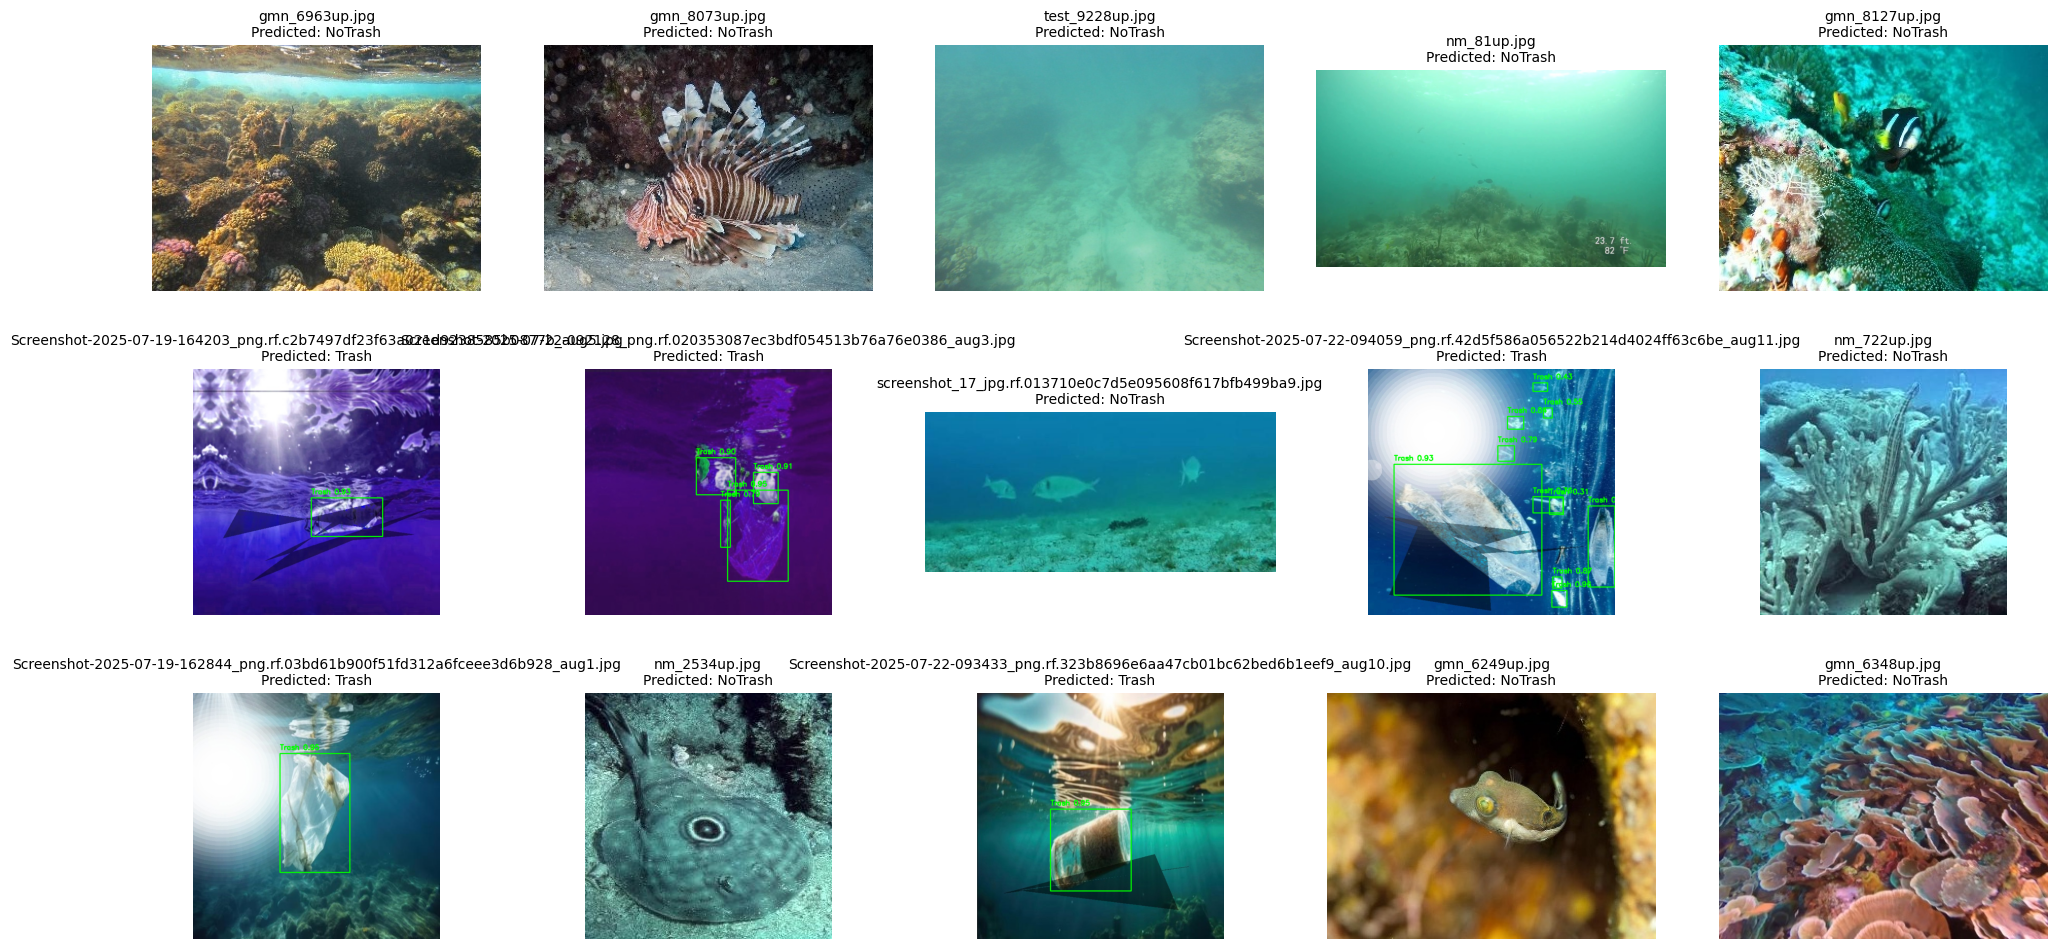

In [ ]:
import cv2
import matplotlib.pyplot as plt
import os
from ultralytics import YOLO

# Paths
test_images_dir = "/kaggle/working/split_data/test/images"
model_path = "/kaggle/working/trash_yolo/yolov8_trash_model/weights/best.pt"

# Load model
model = YOLO(model_path)

NUM_IMAGES_TO_SHOW = 15
ROWS, COLS = 3, 5  # layout grid

def draw_boxes(image, results):
    for box in results.boxes:
        xyxy = box.xyxy[0].tolist()
        conf = box.conf.item()
        cls_id = int(box.cls)
        label = results.names[cls_id]
        cv2.rectangle(image, (int(xyxy[0]), int(xyxy[1])), (int(xyxy[2]), int(xyxy[3])), (0, 255, 0), 2)
        text = f"{label} {conf:.2f}"
        cv2.putText(image, text, (int(xyxy[0]), int(xyxy[1]) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0,255,0), 2)
    return image

plt.figure(figsize=(20, 10))  # wider and taller

count = 0
for img_name in os.listdir(test_images_dir):
    if count >= NUM_IMAGES_TO_SHOW:
        break
    if not img_name.lower().endswith(('.jpg', '.jpeg', '.png')):
        continue

    img_path = os.path.join(test_images_dir, img_name)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    results = model(img_path)[0]

    if results.boxes:
        img_with_boxes = draw_boxes(img.copy(), results)
    else:
        img_with_boxes = img

    plt.subplot(ROWS, COLS, count + 1)
    plt.imshow(img_with_boxes)
    plt.title(f"{img_name}\nPredicted: {'Trash' if results.boxes else 'NoTrash'}", fontsize=10)
    plt.axis('off')

    count += 1

plt.tight_layout(pad=3)  # add padding between subplots
plt.show()


In [ ]:
from collections import Counter

print("\nRunning inference on test images and collecting summary...")

total_images = 0
images_with_detections = 0
total_detections = 0
class_counter = Counter()

for img_name in tqdm(os.listdir(test_images_dir)):
    if not img_name.lower().endswith(('.jpg', '.jpeg', '.png')):
        continue
    total_images += 1
    img_path = os.path.join(test_images_dir, img_name)
    results = model(img_path)[0]

    num_detections = len(results.boxes)
    if num_detections > 0:
        images_with_detections += 1
        for box in results.boxes:
            cls_id = int(box.cls)
            cls_name = results.names[cls_id]
            class_counter[cls_name] += 1
        total_detections += num_detections

    output_path = os.path.join(test_results_dir, img_name)
    results.save(filename=output_path)

print(f"\nTest Summary:")
print(f"Total test images: {total_images}")
print(f"Images with detections: {images_with_detections}")
print(f"Total detected objects: {total_detections}")
print(f"Detections per class: {dict(class_counter)}")
print(f"Test images with predictions saved to {test_results_dir}")



Running inference on test images and collecting summary...


100%|██████████| 1704/1704 [00:26<00:00, 63.46it/s]


Test Summary:
Total test images: 1704
Images with detections: 625
Total detected objects: 1365
Detections per class: {'Trash': 1365}
Test images with predictions saved to /kaggle/working/predictions_test


In [ ]:
best_model_path = "/kaggle/working/trash_yolo/OceanGarbage_LR_Change/weights/best.pt"

In [ ]:
import os
import pandas as pd

# Actual path to results.csv from the training run
results_csv_path = "/kaggle/working/trash_yolo/OceanGarbage_LR_Change/results.csv"

# Load results
results_df = pd.read_csv(results_csv_path)

# Print first 5 rows
print(results_df.head())

# Save to correct location
output_csv_path = "/kaggle/working/trash_yolo/OceanGarbage_LR_Change/training_metrics.csv"
results_df.to_csv(output_csv_path, index=False)

print(f"Training metrics saved to: {output_csv_path}")


   epoch      time  train/box_loss  train/cls_loss  train/dfl_loss  \
0      1   90.6665         0.86334         0.80608         1.17239   
1      2  175.1720         0.83572         0.74626         1.15991   
2      3  257.3090         0.82750         0.76420         1.15374   
3      4  339.7950         0.83723         0.78024         1.16867   
4      5  422.2140         0.83985         0.75966         1.16764   

   metrics/precision(B)  metrics/recall(B)  metrics/mAP50(B)  \
0               0.87348            0.84460           0.90154   
1               0.91406            0.86558           0.92019   
2               0.89876            0.84460           0.91116   
3               0.88573            0.86126           0.90677   
4               0.93870            0.85392           0.93120   

   metrics/mAP50-95(B)  val/box_loss  val/cls_loss  val/dfl_loss    lr/pg0  \
0              0.73007       0.28752       2.37958       0.41713  0.067033   
1              0.74546       0.28106  

In [ ]:
from google.colab import files

files.download('/kaggle/working/trash_yolo/OceanGarbage_LR_Change/training_metrics.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Load the OceanGarbage_LR_Change model weights
model = YOLO('/kaggle/working/trash_yolo/OceanGarbage_LR_Change/weights/best.pt')

# Export to ONNX with simplification for compatibility
model.export(format='onnx', simplify=True, imgsz=640)

Ultralytics 8.3.170 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
💡 ProTip: Export to OpenVINO format for best performance on Intel hardware. Learn more at https://docs.ultralytics.com/integrations/openvino/
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs

PyTorch: starting from '/kaggle/working/trash_yolo/OceanGarbage_LR_Change/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 5, 8400) (6.0 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0,<1.18.0', 'onnxslim>=0.1.59', 'onnxruntime-gpu'] not found, attempting AutoUpdate...

requirements: AutoUpdate success ✅ 4.6s
WARNING ⚠️ requirements: Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.17.0 opset 19...
ONNX: slimming with onnxslim 0.1.61...
ONNX: export success ✅ 6.0s, saved as '/kaggle/working/trash_yolo/OceanGarbage_LR_Change/weights/best.onnx' (11.6 MB)

Export complete (6.3s)
Results saved to /kaggle/w

'/kaggle/working/trash_yolo/OceanGarbage_LR_Change/weights/best.onnx'

In [ ]:
best_weights_onnx = '/kaggle/working/trash_yolo/OceanGarbage_LR_Change/weights/best.onnx'
files.download(best_weights_onnx)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import shutil

# Path to your model's best weights
src = '/kaggle/working/trash_yolo/OceanGarbage_LR_Change/weights/best.pt'

# Destination path inside Colab's /content directory for easy download
dst = '/content/OceanGarbage_LR_Change_best.pt'

shutil.copy(src, dst)

print(f"Copied best weights to {dst}")


Copied best weights to /content/OceanGarbage_LR_Change_best.pt


In [ ]:
best_weights_pt = '/kaggle/working/trash_yolo/OceanGarbage_LR_Change/weights/best.pt'
files.download(best_weights_pt)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
model = '/kaggle/working/data.yaml'
files.download(model)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
model_pt_path = "/kaggle/working/trash_yolo/OceanGarbage_LR_Change/weights/best.pt"
export_dir = "/kaggle/working/trash_yolo/OceanGarbage_LR_Change/weights"

# Load YOLO model
model = YOLO(model_pt_path)

# Export model to TorchScript (outputs saved inside export_dir, filename fixed by Ultralytics)
print("Exporting model to TorchScript...")
model.export(format='torchscript', imgsz=640, device='cpu')

torchscript_path = os.path.join(export_dir, "best.torchscript")

print("Loading TorchScript model for quantization...")
ts_model = torch.jit.load(torchscript_path).eval()

# Apply dynamic quantization
print("Applying dynamic quantization...")
quantized_ts_model = torch.quantization.quantize_dynamic(
    ts_model, {torch.nn.Linear, torch.nn.Conv2d}, dtype=torch.qint8
)

# Save quantized TorchScript model
quantized_path = os.path.join(export_dir, "best_quantized.torchscript.pt")
quantized_ts_model.save(quantized_path)
print(f"Quantized model saved at: {quantized_path}")

# Download all needed files
files.download(model_pt_path)         # Original PyTorch weights
files.download(torchscript_path)      # TorchScript model
files.download(quantized_path)        # Quantized TorchScript model

onnx_path = os.path.join(export_dir, "best.onnx")
if os.path.exists(onnx_path):
    files.download(onnx_path)         # ONNX model if exists

print("All files downloaded.")

Exporting model to TorchScript...
Ultralytics 8.3.170 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs

PyTorch: starting from '/kaggle/working/trash_yolo/OceanGarbage_LR_Change/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 5, 8400) (6.0 MB)

TorchScript: starting export with torch 2.6.0+cu124...
TorchScript: export success ✅ 1.6s, saved as '/kaggle/working/trash_yolo/OceanGarbage_LR_Change/weights/best.torchscript' (11.9 MB)

Export complete (1.9s)
Results saved to /kaggle/working/trash_yolo/OceanGarbage_LR_Change/weights
Predict:         yolo predict task=detect model=/kaggle/working/trash_yolo/OceanGarbage_LR_Change/weights/best.torchscript imgsz=640  
Validate:        yolo val task=detect model=/kaggle/working/trash_yolo/OceanGarbage_LR_Change/weights/best.torchscript imgsz=640 data=/kaggle/working/data.yaml  
Visualize:       https://netron.app
Loading Torch

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

All files downloaded.
